# Mod 5 Project - Capstone
   * Student name: THOMAS J WHIPPLE
   * Student pace: Part-time student
   * Scheduled project review date/time: FRIDAY, JULY 15, 2020, 10:00am
   * Instructor name: JEFF HERMAN 
   * Blog post URL:

How can I use data to improve my local ski mountain?

# Import Necessary Libraries

In [1]:
# Below are the libraries I will use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import folium


# Load the Data

I was given four datasets from Magic Mountain Resort. These are the Liftopia ski ticket data collected from the last four years, 2017 - 2020.

In [422]:
# Liftopia data from 2017
df_2017 = pd.read_csv("Data_Folder/Online Liftopia Magic store Guest sales 10.1.16 to 4.9.17.csv")
df_2017.head()

order_id   ticket_id order_status                              product  \
0  10097099  T110733002    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099  T110733003    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104  T110733016    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104  T110733017    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733  T110735894         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
1           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
2  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
3           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
4           Adult    Liftopia.com  11/15/2016   2/16/2017               No   

     purchaser_address  ... guest_height guest_weight guest_gender  \
0  23 Jefferson Circle  ...          NaN          NaN          NaN   
1  23 Jefferson Circle  ...          NaN          NaN          NaN   
2  23 Jefferson Circle  ...          NaN          NaN          NaN   
3  23 Jefferson Circle  ...          NaN          NaN          NaN   
4                  NaN  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

   guest_equipment_choice  custom_field_question  custom_field_response  
0                     NaN                    NaN                    NaN  
1                     NaN                    NaN                    NaN  
2                     NaN                    NaN                    NaN  
3                     NaN                    NaN                    NaN  
4                     NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [3]:
df_2017.shape

(2819, 28)

In [4]:
# Liftopia data from 2018
df_2018 = pd.read_csv("Data_Folder/Online Liftopia Magic store Guest sales 10.1.17 to 4.8.18.csv")
df_2018.head()

order_id   ticket_id order_status                                product  \
0  10828862  T112041778         PAID  Magic Mountain | Freedom 4-Pack 18/19   
1  10828862  T112041779         PAID  Magic Mountain | Freedom 4-Pack 18/19   
2  10832083  T112047561         PAID  Magic Mountain | Freedom 4-Pack 18/19   
3  10836557  T112055420         PAID    Magic Mountain | 2 Day Lift Tickets   
4  10836557  T112055421         PAID    Magic Mountain | 2 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0           Adult  Magic Mountain   9/29/2017  10/16/2017              Yes   
1           Adult  Magic Mountain   9/29/2017  10/16/2017              Yes   
2           Adult  Magic Mountain   10/2/2017  10/16/2017               No   
3  Youth / Senior    Liftopia.com  10/13/2017  12/26/2017               No   
4           Adult    Liftopia.com  10/13/2017  12/26/2017               No   

       purchaser_address  ... guest_height guest_weight guest_gender  \
0     894 Howard Hill Rd  ...          NaN          NaN          NaN   
1     894 Howard Hill Rd  ...          NaN          NaN          NaN   
2  6180 OLD BRENTFORD CT  ...          NaN          NaN          NaN   
3                    NaN  ...          NaN          NaN          NaN   
4                    NaN  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [423]:
df_2018.shape

(4758, 28)

In [6]:
# Liftopia data from 2019
df_2019 = pd.read_csv("Data_Folder/Online Liftopia Magic Store Guest sales 10.1.18 to 4.7.19.xls.csv")
df_2019.head()

order_id   ticket_id order_status                                product  \
0  11714060  T113603798         PAID  Magic Mountain | Freedom 4-Pack 18/19   
1  11714060  T113603799         PAID  Magic Mountain | Freedom 4-Pack 18/19   
2  11714060  T113603800         PAID  Magic Mountain | Freedom 4-Pack 18/19   
3  11714069  T113603813         PAID  Magic Mountain | Freedom 4-Pack 18/19   
4  11714069  T113603814         PAID  Magic Mountain | Freedom 4-Pack 18/19   

  ticket_type           store order_date   trip_date marketing_opt_in  \
0      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   
1      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   
2      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   
3      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   
4      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   

      purchaser_address  ... guest_height guest_weight guest_gender  \
0  415 E 85th St Apt 9A  ...          NaN          NaN          NaN   
1  415 E 85th St Apt 9A  ...          NaN          NaN          NaN   
2  415 E 85th St Apt 9A  ...          NaN          NaN          NaN   
3     2944 Cambridge rd  ...          NaN          NaN          NaN   
4     2944 Cambridge rd  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [7]:
df_2019.shape

(6745, 28)

In [8]:
# Liftopia data from 2020 - this data set has less since the resort closed early due to Covid-19
df_2020 = pd.read_csv("Data_Folder/Online Liftopia magic store Guests 10.1.19 to 3.15.20.csv")
df_2020.head()

order_id   ticket_id order_status                              product  \
0         NaN         NaN          NaN                                  NaN   
1  12833501.0  T115609601         PAID  Magic Mountain | 1 Day Lift Tickets   
2  12833501.0  T115609602         PAID  Magic Mountain | 1 Day Lift Tickets   
3  12833547.0  T115609703         PAID  Magic Mountain | 1 Day Lift Tickets   
4  12833547.0  T115609704         PAID  Magic Mountain | 1 Day Lift Tickets   

  ticket_type           store order_date  trip_date marketing_opt_in  \
0         NaN             NaN        NaN        NaN              NaN   
1       Adult  Magic Mountain  6/27/2019   2/2/2020               No   
2       Adult  Magic Mountain  6/27/2019   2/2/2020               No   
3       Adult  Magic Mountain  6/27/2019  1/26/2020               No   
4       Adult  Magic Mountain  6/27/2019  1/26/2020               No   

  purchaser_address  ... guest_height guest_weight guest_gender  \
0               NaN  ...          NaN          NaN          NaN   
1      21194 Rt. 22  ...          NaN          NaN          NaN   
2      21194 Rt. 22  ...          NaN          NaN          NaN   
3      21194 Rt. 22  ...          NaN          NaN          NaN   
4      21194 Rt. 22  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [9]:
df_2020.shape

(6188, 28)

In [10]:
# Put the four datasets into one dataframe
data = pd.concat([df_2017, df_2018, df_2019, df_2020], axis=0, sort=False)
data.head()

order_id   ticket_id order_status                              product  \
0  10097099.0  T110733002    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0  T110733003    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0  T110733016    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0  T110733017    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733.0  T110735894         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
1           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
2  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
3           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
4           Adult    Liftopia.com  11/15/2016   2/16/2017               No   

     purchaser_address  ... guest_height guest_weight guest_gender  \
0  23 Jefferson Circle  ...          NaN          NaN          NaN   
1  23 Jefferson Circle  ...          NaN          NaN          NaN   
2  23 Jefferson Circle  ...          NaN          NaN          NaN   
3  23 Jefferson Circle  ...          NaN          NaN          NaN   
4                  NaN  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [11]:
data.shape

(20510, 28)

In [12]:
data.reset_index(drop=True, inplace=True)

# EDA

In [13]:
# Most of the data is categorical
data.describe()

order_id  net_rate_revenue  barcode  guest_height  guest_weight  \
count  2.050900e+04      20506.000000      0.0   1358.000000   1358.000000   
mean   1.223341e+07         51.058487      NaN     66.582474    150.027982   
std    1.151902e+06         24.027872      NaN      5.618835     42.383039   
min    1.009710e+07          1.860000      NaN     43.000000     36.000000   
25%    1.131234e+07         37.390000      NaN     64.000000    121.000000   
50%    1.217216e+07         47.420000      NaN     67.000000    150.000000   
75%    1.324507e+07         57.650000      NaN     71.000000    180.000000   
max    1.428648e+07        261.320000      NaN     82.000000    331.000000   

       guest_shoe_size  
count      1358.000000  
mean          8.990795  
std           2.247431  
min           1.000000  
25%           7.500000  
50%           9.000000  
75%          10.500000  
max          14.500000

In [14]:
# Total of 28 columns
data.columns

Index(['order_id', 'ticket_id', 'order_status', 'product', 'ticket_type',
       'store', 'order_date', 'trip_date', 'marketing_opt_in',
       'purchaser_address', 'purchaser_city', 'purchaser_state',
       'purchaser_zip', 'purchaser_country', 'net_rate_revenue', 'currency',
       'barcode', 'guest_birthdate', 'guest_height', 'guest_weight',
       'guest_gender', 'guest_ability_level', 'guest_shoe_size',
       'guest_shoe_style', 'guest_shoe_type', 'guest_equipment_choice',
       'custom_field_question', 'custom_field_response'],
      dtype='object')

In [15]:
# 20,509 rows with lots of missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20510 entries, 0 to 20509
Data columns (total 28 columns):
order_id                  20509 non-null float64
ticket_id                 20509 non-null object
order_status              20509 non-null object
product                   20509 non-null object
ticket_type               20509 non-null object
store                     20509 non-null object
order_date                20509 non-null object
trip_date                 20509 non-null object
marketing_opt_in          20509 non-null object
purchaser_address         14222 non-null object
purchaser_city            19822 non-null object
purchaser_state           19755 non-null object
purchaser_zip             19819 non-null object
purchaser_country         19798 non-null object
net_rate_revenue          20506 non-null float64
currency                  20509 non-null object
barcode                   0 non-null float64
guest_birthdate           1358 non-null object
guest_height              135

In [16]:
# All the columns that don't have enough information - going to drop
guest_data = ['barcode', 'guest_birthdate', 'guest_height', 'guest_weight', 
              'guest_gender', 'guest_ability_level', 'guest_shoe_size',
              'guest_shoe_style', 'guest_shoe_type', 'guest_equipment_choice',
              'custom_field_question', 'custom_field_response']
df = data.drop(columns = guest_data, axis=0)                
df.head()         

order_id   ticket_id order_status                              product  \
0  10097099.0  T110733002    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0  T110733003    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0  T110733016    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0  T110733017    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733.0  T110735894         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
1           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
2  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
3           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
4           Adult    Liftopia.com  11/15/2016   2/16/2017               No   

     purchaser_address purchaser_city purchaser_state purchaser_zip  \
0  23 Jefferson Circle        Clinton              CT          6413   
1  23 Jefferson Circle        Clinton              CT          6413   
2  23 Jefferson Circle        Clinton              CT          6413   
3  23 Jefferson Circle        Clinton              CT          6413   
4                  NaN       Guilford              VT          5301   

  purchaser_country  net_rate_revenue currency  
0                US             50.21      USD  
1                US             69.74      USD  
2     United States             50.21      USD  
3     United States             69.74      USD  
4     United States             19.54      USD

In [424]:
data.columns

Index(['order_id', 'ticket_id', 'order_status', 'product', 'ticket_type',
       'store', 'order_date', 'trip_date', 'marketing_opt_in',
       'purchaser_address', 'purchaser_city', 'purchaser_state',
       'purchaser_zip', 'purchaser_country', 'net_rate_revenue', 'currency',
       'barcode', 'guest_birthdate', 'guest_height', 'guest_weight',
       'guest_gender', 'guest_ability_level', 'guest_shoe_size',
       'guest_shoe_style', 'guest_shoe_type', 'guest_equipment_choice',
       'custom_field_question', 'custom_field_response'],
      dtype='object')

### Guest Data

In [18]:
# Keep in mind that there are only 1358 rows of the 20509 or about 6.6% of the data

In [19]:
# I imagine that the majority of skiiers with experience don't enter this info.
data.guest_ability_level.value_counts()

Beginner                  646
Intermediate              541
Advanced                  120
Type I (Beginner)          34
Type II (Intermediate)     13
Type III (Advanced)         4
Name: guest_ability_level, dtype: int64

In [20]:
# This is interesting in only the fact that it is probably for rental equipment
data.guest_equipment_choice.value_counts()

Skis                             1134
Snowboard: Left Foot Forward      143
Snowboard: Right Foot Forward      81
Name: guest_equipment_choice, dtype: int64

### Guest Age

In [21]:
# Again, I have less than 7% of birthdates from the dataset
data.guest_birthdate.count()

1358

In [22]:
# Create a new df for age
age = data.filter(['guest_birthdate', 'trip_date'], axis=1)

In [23]:
age.head()

guest_birthdate   trip_date
0             NaN  12/31/2016
1             NaN  12/31/2016
2             NaN  12/31/2016
3             NaN  12/31/2016
4             NaN   2/16/2017

In [24]:
# Convert both dates to datetime
age['guest_birthdate'] = pd.to_datetime(age['guest_birthdate'])
age['trip_date'] = pd.to_datetime(age['trip_date'])

In [25]:
# Lots of missing data here as well
age.head()

guest_birthdate  trip_date
0             NaT 2016-12-31
1             NaT 2016-12-31
2             NaT 2016-12-31
3             NaT 2016-12-31
4             NaT 2017-02-16

In [26]:
# Drop the missing values
age = age.dropna()

In [27]:
# Check out the age df
age.head()

guest_birthdate  trip_date
2849      1995-04-25 2018-01-20
2864      1968-08-29 2018-01-13
2895      1969-12-17 2018-01-13
2896      1971-02-01 2018-01-13
2897      2000-09-16 2018-01-13

In [28]:
# What is the mean birthdate?
age.guest_birthdate.mean()

Timestamp('1990-04-03 14:10:25.625920512')

In [29]:
# Now I want to figure out how old they are...
age['years_old'] = (age['trip_date'] - age['guest_birthdate'])

In [30]:
# Change this datetime value to years 'Y'
age['years_old'] = age['years_old']/np.timedelta64(1,'Y')

In [31]:
# Look at the new column
age.head()

guest_birthdate  trip_date  years_old
2849      1995-04-25 2018-01-20  22.741056
2864      1968-08-29 2018-01-13  49.375415
2895      1969-12-17 2018-01-13  48.074909
2896      1971-02-01 2018-01-13  46.949629
2897      2000-09-16 2018-01-13  17.325476

In [32]:
# Not sure why there are negative ages
age.years_old.describe()

count    1358.000000
mean       28.828437
std        14.263492
min        -0.637932
25%        17.551353
50%        26.337296
75%        38.617494
max        77.781200
Name: years_old, dtype: float64

In [33]:
# Guess some people just put in a random date
age[age.years_old < 0]

guest_birthdate  trip_date  years_old
5174       2018-10-08 2018-02-17  -0.637932
5441       2018-04-30 2018-02-19  -0.191653
7178       2018-05-26 2018-03-22  -0.177964
7179       2018-10-12 2018-03-22  -0.558533
18785      2020-07-18 2020-02-17  -0.416162

In [34]:
# Get rid of all those negatives
age = age[age.years_old > 0] 

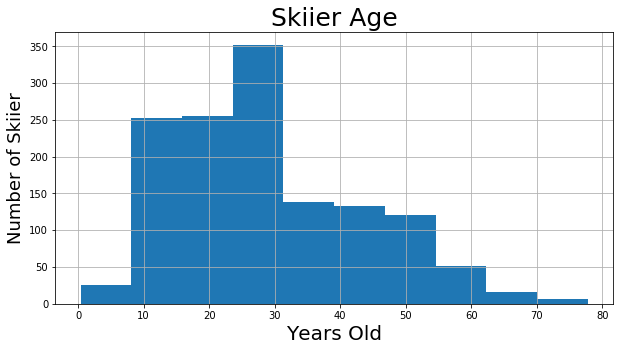

In [35]:
# Get a visual of ages
age.years_old.hist(figsize=(10,5))
plt.ylabel("Number of Skiier",fontsize=18)
plt.xlabel("Years Old", fontsize=20)
plt.title('Skiier Age', fontsize=25)
plt.show()

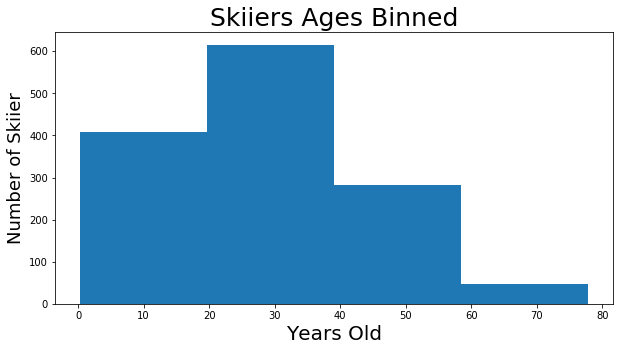

In [36]:
# Thought I'd look at ages in terms of groups
age.years_old.hist(bins=4, grid=False, figsize=(10,5))
plt.ylabel("Number of Skiier",fontsize=18)
plt.xlabel("Years Old", fontsize=20)
plt.title('Skiiers Ages Binned', fontsize=25)
plt.show()

***While it may not be representative of the whole dataset, it's still interesting -
though it may also be similar to all USA age demographics in general***

### Country

In [37]:
# Check out the different countries where people come from to ski
df['purchaser_country'].value_counts()

US               17374
United States     2303
CA                  41
GB                  26
Canada               8
AU                   7
SE                   5
DK                   5
PR                   4
Australia            4
DO                   4
DE                   3
NO                   3
Brazil               3
NL                   2
Other                2
Denmark              2
BR                   2
Name: purchaser_country, dtype: int64

In [38]:
# We don't need the USA twice!
df['purchaser_country'].replace(to_replace='United States', value='US', inplace=True)

In [39]:
# Check to see if it worked.
df['purchaser_country'].value_counts()

US           19677
CA              41
GB              26
Canada           8
AU               7
SE               5
DK               5
PR               4
Australia        4
DO               4
DE               3
NO               3
Brazil           3
NL               2
Other            2
Denmark          2
BR               2
Name: purchaser_country, dtype: int64

In [40]:
# What are these other places?
# CA is Candada, GB looks like Great Britian... Europe
df.loc[df['purchaser_country'] == 'Other']

order_id   ticket_id order_status  \
5  10099851.0  T110737788    CANCELLED   
6  10099851.0  T110737789    CANCELLED   

                                       product ticket_type           store  \
5  Magic Mountain | 1 Day Lift Ticket + Rental       Adult  Magic Mountain   
6  Magic Mountain | 1 Day Lift Ticket + Rental       Adult  Magic Mountain   

   order_date trip_date marketing_opt_in          purchaser_address  \
5  11/17/2016  1/5/2017              Yes  30 Victoria Gardens South   
6  11/17/2016  1/5/2017              Yes  30 Victoria Gardens South   

  purchaser_city purchaser_state purchaser_zip purchaser_country  \
5   Diego Martin           Other             0             Other   
6   Diego Martin           Other             0             Other   

   net_rate_revenue currency  
5             48.35      USD  
6             48.35      USD

In [41]:
# Get rid of everything that isn't USA
df = df[df['purchaser_country'] == 'US']

In [42]:
# See if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19677 entries, 0 to 20509
Data columns (total 16 columns):
order_id             19677 non-null float64
ticket_id            19677 non-null object
order_status         19677 non-null object
product              19677 non-null object
ticket_type          19677 non-null object
store                19677 non-null object
order_date           19677 non-null object
trip_date            19677 non-null object
marketing_opt_in     19677 non-null object
purchaser_address    14111 non-null object
purchaser_city       19675 non-null object
purchaser_state      19608 non-null object
purchaser_zip        19672 non-null object
purchaser_country    19677 non-null object
net_rate_revenue     19677 non-null float64
currency             19677 non-null object
dtypes: float64(2), object(14)
memory usage: 2.6+ MB


### Other Columns

In [43]:
# What is the Order ID and is it important?
df['order_id'].value_counts()

11006409.0    11
10511636.0     9
10485804.0     9
14046002.0     9
10151249.0     9
              ..
11181119.0     1
14065118.0     1
11443644.0     1
12589735.0     1
11456077.0     1
Name: order_id, Length: 10876, dtype: int64

In [44]:
# Looks like some people make multiple orders, for groups maybe
df[df['order_id'] == 11006409.0].head()

order_id   ticket_id order_status  \
3345  11006409.0  T112358047         PAID   
3346  11006409.0  T112358048         PAID   
3347  11006409.0  T112358049         PAID   
3348  11006409.0  T112358050         PAID   
3349  11006409.0  T112358051         PAID   

                                  product     ticket_type           store  \
3345  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   
3346  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   
3347  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   
3348  Magic Mountain | 1 Day Lift Tickets  Youth / Senior  Magic Mountain   
3349  Magic Mountain | 1 Day Lift Tickets  Youth / Senior  Magic Mountain   

      order_date   trip_date marketing_opt_in purchaser_address  \
3345  12/26/2017  12/27/2017               No         37 Brooks   
3346  12/26/2017  12/27/2017               No         37 Brooks   
3347  12/26/2017  12/27/2017               No         37 Brooks   
3348  12/26/2017  12/27/2017               No         37 Brooks   
3349  12/26/2017  12/27/2017               No         37 Brooks   

     purchaser_city purchaser_state purchaser_zip purchaser_country  \
3345     New Canaan              CT          6840                US   
3346     New Canaan              CT          6840                US   
3347     New Canaan              CT          6840                US   
3348     New Canaan              CT          6840                US   
3349     New Canaan              CT          6840                US   

      net_rate_revenue currency  
3345             50.21      USD  
3346             50.21      USD  
3347             50.21      USD  
3348             39.98      USD  
3349             39.98      USD

In [45]:
# And Ticket ID?
df['ticket_id'].value_counts()

T113083049    1
T117241090    1
T110855067    1
T114897873    1
T117608694    1
             ..
T117663094    1
T113327442    1
T111550711    1
T116775445    1
T114941463    1
Name: ticket_id, Length: 19677, dtype: int64

In [46]:
# Since all are unique they don't seem important
df = df.drop(['ticket_id'], axis = 1)

In [47]:
# What is Order Status?
df['order_status'].value_counts()

PAID         19189
CANCELLED      488
Name: order_status, dtype: int64

### Product Types

In [48]:
# Not sure of the difference between Magic and Liftopia
df['store'].value_counts()

Magic Mountain    14118
Liftopia.com       5559
Name: store, dtype: int64

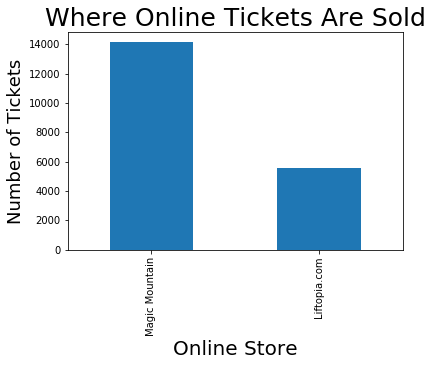

In [49]:
df['store'].value_counts().plot(kind='bar')
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Online Store", fontsize=20)
plt.title('Where Online Tickets Are Sold', fontsize=25)
plt.show()
# Or like this:
#df.groupby('store').size().plot(kind='bar')

***About three quarters of online business comes directly from the mountain***

In [50]:
# Look at the different possible products
df['product'].value_counts()

Magic Mountain | 1 Day Lift Tickets                                          14651
Magic Mountain | 2 Day Lift Tickets                                           1915
Magic Mountain | 1 Day Lift Ticket + Rental                                   1170
Magic Mountain | All Day Tubing                                                761
Magic Mountain | 3 Day Lift Tickets                                            417
Magic Mountain | 2 Day Lift Ticket + Rental                                    362
Magic Mountain | 1 Day Lift Ticket + Tubing                                    258
Magic Mountain | 3 Day Lift Ticket + Rental                                     45
Magic Mountain | Freedom 4-Pack 18/19                                           36
Magic Mountain | 2019/20 Freedom 4-Pack                                         36
Magic Mountain | Winter 19-20 Single Day Flexible Tickets | Valid Any Day       17
Magic Mountain | Winter 18-19 Single Day Flexible Tickets | Valid Any Day        9
Name

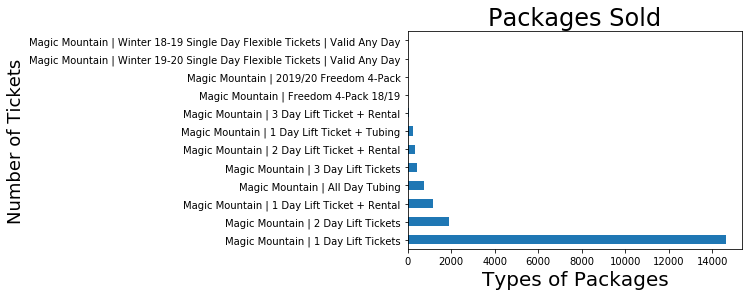

In [51]:
# Get a visual
df['product'].value_counts().plot(kind="barh")
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Types of Packages", fontsize=20)
plt.title('Packages Sold', fontsize=24)
plt.show()

***Looks like single day lift tickets are far and away the most common.***

In [52]:
# Total number of rentals bought with tickets
rentals = df[(df['product'] == 'Magic Mountain | 1 Day Lift Ticket + Rental') |
             (df['product'] == 'Magic Mountain | 2 Day Lift Ticket + Rental') |
             (df['product'] == 'Magic Mountain | 3 Day Lift Ticket + Rental')].count()

In [53]:
# Rentals as a percent
print("Total percent of online rentals bought", 
      round(rentals['product']/len(df['product'])*100,2),'%')

Total percent of online rentals bought 8.01 %


In [54]:
# Check out Ticket Types
df['ticket_type'].value_counts()

Adult             13873
Youth / Senior     4976
All Ages            761
4-Pack               67
Name: ticket_type, dtype: int64

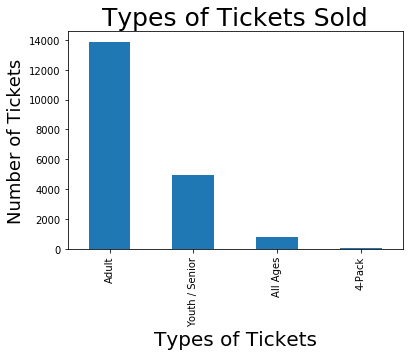

In [55]:
# Graph Ticket Types - looks like it's about 75% "Adult"
df['ticket_type'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Types of Tickets", fontsize=20)
plt.title('Types of Tickets Sold', fontsize=25)
plt.show()

***I would love to have Youth and Senior broken up. Not sure why they even have an 'All
Ages' group. ***

## Ticket Time

#### Order Time

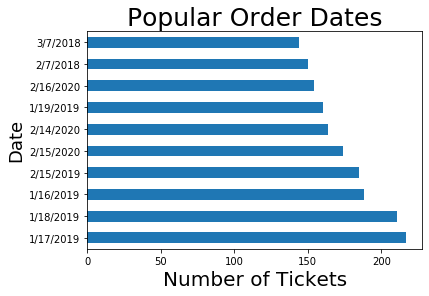

In [56]:
# When are people 'thinking' and 'planning' their ski trips?
df['order_date'].value_counts()[0:10].plot(kind='barh')
plt.ylabel("Date",fontsize=18)
plt.xlabel("Number of Tickets", fontsize=20)
plt.title('Popular Order Dates', fontsize=25)
plt.show()

***Looks like MLK Weekend, Presidents Day Weekend, Feburary Break - again, the resort
probably already knows what the busy weekends are going to be***

#### Trip Time

In [57]:
# Still not in datetime...
df['trip_date'].value_counts()

1/20/2019     472
2/15/2020     383
2/16/2020     357
1/19/2019     348
1/19/2020     344
             ... 
12/17/2016      2
12/18/2016      2
3/22/2019       2
3/2/2017        1
3/30/2017       1
Name: trip_date, Length: 298, dtype: int64

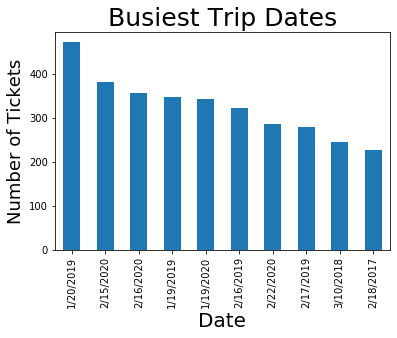

In [58]:
# What are the busiest dates?
df['trip_date'].value_counts()[0:10].plot(kind='bar')
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Date", fontsize=20)
plt.title('Busiest Trip Dates', fontsize=25)
plt.show()

***Looks pretty similar to when people are ordering tickets***

#### Order Trip Time Difference

In [59]:
# Change date types to datetime %Y-%m-%d
df['order_date'] = pd.to_datetime(df['order_date'])
df['trip_date'] = pd.to_datetime(df['trip_date'])

In [60]:
# Check to see if it worked
df['trip_date'].head()

0   2016-12-31
1   2016-12-31
2   2016-12-31
3   2016-12-31
4   2017-02-16
Name: trip_date, dtype: datetime64[ns]

In [61]:
# Create new column with the difference between order date and ticket date
df['order_to_trip_days'] = (df['trip_date'] - df['order_date']).dt.days

In [62]:
# Look at these stats
df['order_to_trip_days'].describe()

count    19677.000000
mean         7.524928
std         16.735216
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        227.000000
Name: order_to_trip_days, dtype: float64

In [63]:
# Create a new df to play with
difference = df['order_to_trip_days']

In [64]:
# Look for three standard deviations above the mean
diff_outliers = difference.mean() + 3*difference.std()
# Count how many rows are outliers
print("Number of outliers:", (difference > diff_outliers).sum())
# Remove outliers from the data
difference = difference[difference < diff_outliers]
difference.describe()

Number of outliers: 492


count    19185.000000
mean         5.315559
std          8.102662
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         57.000000
Name: order_to_trip_days, dtype: float64

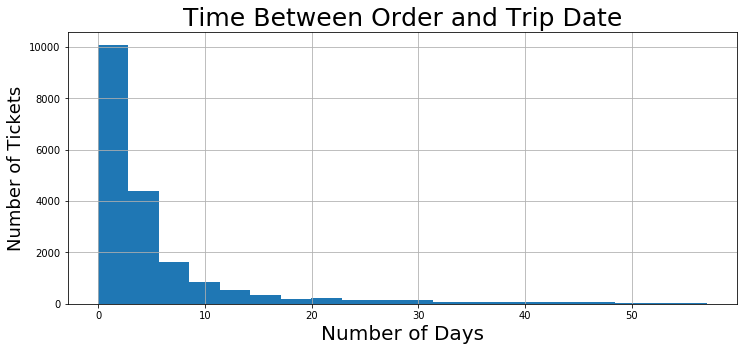

In [65]:
# Looks like most people buy tickets 1 or 2 days before they go skiing.
difference.hist(figsize =(12,5), bins=20)
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Number of Days", fontsize=20)
plt.title('Time Between Order and Trip Date', fontsize=25)
plt.show()

***So most people order their tickets a day or two before - probably depending on the 
amount of snowfall and conditions***

In [66]:
# Perhaps I need to look at the difference of Liftopia vs Magic?

In [67]:
# Look at a map of distance from resort based on order_to_trip

## Zip Code

In [68]:
# Some of the zip codes are written with extra four digits
df['purchaser_zip'][25:35]

30          7063
31    01053-9100
32    01053-9100
33         33837
34         33837
35         33837
36         33837
37         33837
38         33837
39          5253
Name: purchaser_zip, dtype: object

In [69]:
# Look at the different zip codes
df['purchaser_zip'].value_counts()

6824          194
6443          182
6424          166
5301          113
6084          111
             ... 
17241           1
08850-1318      1
4101            1
30066           1
19352           1
Name: purchaser_zip, Length: 2575, dtype: int64

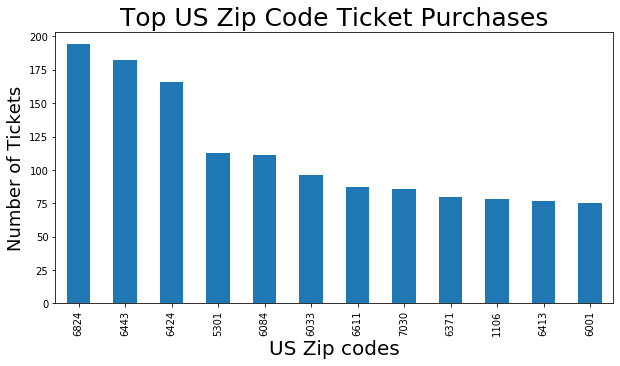

In [70]:
# Top ten zip codes where skiiers come from
df['purchaser_zip'].value_counts()[:12].plot(kind='bar', figsize=(10,5))
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("US Zip codes", fontsize=20)
plt.title('Top US Zip Code Ticket Purchases', fontsize=25)
plt.show()

***Most of these zip codes are in Conneticut, Mass, and New York***

In [71]:
# There are some missing zip codes!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19677 entries, 0 to 20509
Data columns (total 16 columns):
order_id              19677 non-null float64
order_status          19677 non-null object
product               19677 non-null object
ticket_type           19677 non-null object
store                 19677 non-null object
order_date            19677 non-null datetime64[ns]
trip_date             19677 non-null datetime64[ns]
marketing_opt_in      19677 non-null object
purchaser_address     14111 non-null object
purchaser_city        19675 non-null object
purchaser_state       19608 non-null object
purchaser_zip         19672 non-null object
purchaser_country     19677 non-null object
net_rate_revenue      19677 non-null float64
currency              19677 non-null object
order_to_trip_days    19677 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(1), object(11)
memory usage: 2.6+ MB


In [72]:
# First I need to get rid of the NaN's and nine digit zip codes
df.dropna(subset=['purchaser_zip'], inplace=True)

In [73]:
# Split the zip codes and get rid of the extra four digits
df['purchaser_zip'] = df['purchaser_zip'].map(lambda x: x.split('-')[0])

In [74]:
# Check to see if it worked
df['purchaser_zip'][25:35]

30     7063
31    01053
32    01053
33    33837
34    33837
35    33837
36    33837
37    33837
38    33837
39     5253
Name: purchaser_zip, dtype: object

In [75]:
# # One of the random zip codes people entered!
df.replace(to_replace='O6073', value='06073', inplace=True)

In [76]:
# Another of the random zip codes people entered!
df.replace(to_replace='us, 05359', value='05359', inplace=True)

In [77]:
# Again of the random zip codes people entered!
df.replace(to_replace='us, 06489', value='06489', inplace=True)

In [78]:
# Another of the random zip codes people entered!
df.replace(to_replace='10506`\\', value='10506', inplace=True)

In [79]:
# Last one of the random zip codes people entered!
df.replace(to_replace='us, 12508', value='12508', inplace=True)

In [80]:
# Last one of the random zip codes people entered!
df.replace(to_replace='112384883', value='11238', inplace=True)

In [81]:
# Last one of the random zip codes people entered!
df.replace(to_replace='88763920', value='8876', inplace=True)

In [82]:
# Last one of the random zip codes people entered!
df.replace(to_replace='2039935884', value='06612', inplace=True)

In [83]:
# Last one of the random zip codes people entered!
df.replace(to_replace='111214', value='11214', inplace=True)

In [84]:
# Last one of the random zip codes people entered!
df.replace(to_replace='10604216', value='1060', inplace=True)

In [85]:
# Change the zip codes into integers
df.purchaser_zip = df.purchaser_zip.astype(int)

In [86]:
df.purchaser_zip.describe()

count    19672.000000
mean      8939.264437
std      10626.034422
min          0.000000
25%       3608.000000
50%       6525.000000
75%      11101.000000
max      98629.000000
Name: purchaser_zip, dtype: float64

In [87]:
df.loc[df.purchaser_zip > 99999]

Empty DataFrame
Columns: [order_id, order_status, product, ticket_type, store, order_date, trip_date, marketing_opt_in, purchaser_address, purchaser_city, purchaser_state, purchaser_zip, purchaser_country, net_rate_revenue, currency, order_to_trip_days]
Index: []

In [88]:
df.loc[df.purchaser_zip < 999]

order_id order_status                              product  \
626    10437576.0         PAID  Magic Mountain | 1 Day Lift Tickets   
2122   10592117.0         PAID  Magic Mountain | 2 Day Lift Tickets   
12533  12473498.0         PAID  Magic Mountain | 1 Day Lift Tickets   
12534  12473541.0         PAID  Magic Mountain | 1 Day Lift Tickets   
13715  12630004.0         PAID  Magic Mountain | 1 Day Lift Tickets   
16553  13576974.0         PAID  Magic Mountain | 2 Day Lift Tickets   
18946  14008380.0         PAID  Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
626             Adult  Magic Mountain 2017-01-29 2017-01-29              Yes   
2122   Youth / Senior  Magic Mountain 2017-02-22 2017-02-24               No   
12533           Adult  Magic Mountain 2019-02-18 2019-02-20               No   
12534           Adult  Magic Mountain 2019-02-18 2019-02-20               No   
13715           Adult    Liftopia.com 2019-03-08 2019-03-09               No   
16553  Youth / Senior  Magic Mountain 2020-01-16 2020-01-18               No   
18946           Adult  Magic Mountain 2020-02-17 2020-02-19               No   

         purchaser_address  purchaser_city purchaser_state  purchaser_zip  \
626          50 joghill rd        Trumbull              CT            661   
2122   47 Cottage farms rd  Cape elizabeth              ME             47   
12533       94 Merrill Ave          Lowell              MA            850   
12534       94 Merrill Ave          Lowell              MA            850   
13715                  NaN          Wilton              NH              0   
16553  47 Cottage farms rd  Cape elizabeth              ME             47   
18946       94 Merrill Ave          Lowell              MA            850   

      purchaser_country  net_rate_revenue currency  order_to_trip_days  
626                  US             53.94      USD                   0  
2122                 US             58.58      USD                   2  
12533                US             47.42      USD                   2  
12534                US             49.28      USD                   2  
13715                US             53.54      USD                   1  
16553                US             72.53      USD                   2  
18946                US             46.49      USD                   2

### Zip Code Map

In [89]:
# Zip code info from zipcode database
# https://www.unitedstateszipcodes.org/zip-code-database/

latlong_codes = pd.read_csv("Data_Folder/zip_code_database.csv")
latlong_codes.head()

zip      type  decommissioned primary_city acceptable_cities  \
0  501    UNIQUE               0   Holtsville               NaN   
1  544    UNIQUE               0   Holtsville               NaN   
2  601  STANDARD               0     Adjuntas               NaN   
3  602  STANDARD               0       Aguada               NaN   
4  603  STANDARD               0    Aguadilla             Ramey   

                                 unacceptable_cities state  \
0                               I R S Service Center    NY   
1                                 Irs Service Center    NY   
2  Colinas Del Gigante, Jard De Adjuntas, Urb San...    PR   
3  Alts De Aguada, Bo Guaniquilla, Comunidad Las ...    PR   
4  Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...    PR   

                county             timezone area_codes world_region country  \
0       Suffolk County     America/New_York        631          NaN      US   
1       Suffolk County     America/New_York        631          NaN      US   
2   Adjuntas Municipio  America/Puerto_Rico    787,939          NaN      US   
3     Aguada Municipio  America/Puerto_Rico    787,939          NaN      US   
4  Aguadilla Municipio  America/Puerto_Rico        787          NaN      US   

   latitude  longitude  irs_estimated_population_2015  
0     40.81     -73.04                            562  
1     40.81     -73.04                              0  
2     18.16     -66.72                              0  
3     18.38     -67.18                              0  
4     18.43     -67.15                              0

In [90]:
# I just want the zipcodes and the lat/lon
latlong_codes = latlong_codes.filter(['zip','latitude', 'longitude'], axis=1)
latlong_codes.head()

zip  latitude  longitude
0  501     40.81     -73.04
1  544     40.81     -73.04
2  601     18.16     -66.72
3  602     18.38     -67.18
4  603     18.43     -67.15

In [91]:
# Merge the lat and lon with my original dataframe
skiier_map = df.merge(latlong_codes, left_on='purchaser_zip', right_on='zip')
skiier_map.head()

order_id order_status                              product  \
0  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10402020.0         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store order_date  trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
1           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
2  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
3           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
4           Adult    Liftopia.com 2017-01-23 2017-01-28               No   

     purchaser_address purchaser_city purchaser_state  purchaser_zip  \
0  23 Jefferson Circle        Clinton              CT           6413   
1  23 Jefferson Circle        Clinton              CT           6413   
2  23 Jefferson Circle        Clinton              CT           6413   
3  23 Jefferson Circle        Clinton              CT           6413   
4                  NaN        clinton              CT           6413   

  purchaser_country  net_rate_revenue currency  order_to_trip_days   zip  \
0                US             50.21      USD                  50  6413   
1                US             69.74      USD                  50  6413   
2                US             50.21      USD                  50  6413   
3                US             69.74      USD                  50  6413   
4                US             40.79      USD                   5  6413   

   latitude  longitude  
0     41.27     -72.53  
1     41.27     -72.53  
2     41.27     -72.53  
3     41.27     -72.53  
4     41.27     -72.53

In [92]:
# Create a new df with unique zip codes
df_zip = skiier_map.drop_duplicates(subset='purchaser_zip')

In [93]:
# How many different zip codes are there
df_zip.shape

(2387, 19)

#### All Unique Zip Code Map

In [94]:
# Find out where these zip codes are located
map_zipcodes = folium.Map([41.4090, -75.6624],zoom_start=6, min_zoom=6, 
                    width=800,height=600)

icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_zipcodes)

# Location by Zip code
for lat, lon in zip(df_zip['latitude'], df_zip['longitude']):
     folium.CircleMarker([lat, lon], radius=2, color='crimson',
    fill=False).add_to(map_zipcodes)

map_zipcodes

***I like this map showing all four years of where skiiers visited from. Unfortunately, it
is mostly just based on major metro areas***

#### Heat Map

In [95]:
# Trying to look at a heat map of purchases based on zip code

from folium import plugins
from folium.plugins import HeatMap

# Find out where these zip codes are located
map_heat = folium.Map([42.3232, -72.6547],zoom_start=8, 
                    width=800,height=500)

# Fun Resort Icon
icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_heat)

# Convert to (n, 2) nd-array format for heatmap
#zipArr = skiier_map[['latitude', 'longitude']].as_matrix()

# Old method is depreciated, use this now
zipArr = skiier_map[['latitude', 'longitude']].values

# plot heatmap
map_heat .add_child(plugins.HeatMap(zipArr, radius=15))

map_heat 

***This map again shows lots of major cities where skiiers came from but has better detail
compared to the map above***

#### Yearly Map

In [96]:
# Looking for ways to differentiate the years

In [97]:
# Create a new df with unique zip codes for 2017
date_range = (skiier_map['trip_date'] > '2016-10-1') & (skiier_map['trip_date'] <= '2017-4-9')
skiiers_2017 = skiier_map.loc[date_range]
skiiers_2017_zipcodes = skiiers_2017.drop_duplicates(subset='purchaser_zip')
skiiers_2017_zipcodes.shape

(776, 19)

In [98]:
skiiers_2017_zipcodes.head()

order_id order_status                                      product  \
0    10097099.0    CANCELLED          Magic Mountain | 2 Day Lift Tickets   
77   10098733.0         PAID          Magic Mountain | 1 Day Lift Tickets   
190  10101684.0    CANCELLED          Magic Mountain | 1 Day Lift Tickets   
195  10105009.0         PAID          Magic Mountain | 3 Day Lift Tickets   
236  10106627.0    CANCELLED  Magic Mountain | 1 Day Lift Ticket + Rental   

        ticket_type           store order_date  trip_date marketing_opt_in  \
0    Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
77            Adult    Liftopia.com 2016-11-15 2017-02-16               No   
190           Adult  Magic Mountain 2016-11-20 2016-12-31               No   
195           Adult  Magic Mountain 2016-11-23 2017-02-17              Yes   
236  Youth / Senior  Magic Mountain 2016-11-25 2016-12-28               No   

        purchaser_address  purchaser_city purchaser_state  purchaser_zip  \
0     23 Jefferson Circle         Clinton              CT           6413   
77                    NaN        Guilford              VT           5301   
190   117 Feedwater Court    Stewartstown              PA          17363   
195  1128 Lawrence Avenue  Point Pleasant              NJ           8742   
236   110 Chardonnay Lane         Tolland              CT           6084   

    purchaser_country  net_rate_revenue currency  order_to_trip_days    zip  \
0                  US             50.21      USD                  50   6413   
77                 US             19.54      USD                  93   5301   
190                US             42.77      USD                  41  17363   
195                US            118.10      USD                  86   8742   
236                US             56.72      USD                  33   6084   

     latitude  longitude  
0       41.27     -72.53  
77      42.86     -72.57  
190     39.75     -76.59  
195     40.09     -74.04  
236     41.88     -72.36

In [99]:
# Create a new df with unique zip codes for 2018
date_range = (skiier_map['trip_date'] > '2017-10-1') & (skiier_map['trip_date'] <= '2018-4-8')
skiiers_2018 = skiier_map.loc[date_range]
skiiers_2018_zipcodes = skiiers_2018.drop_duplicates(subset='purchaser_zip')
skiiers_2018_zipcodes.shape

(1157, 19)

In [100]:
# Create a new df with unique zip codes for 2019
date_range = (skiier_map['trip_date'] > '2018-10-1') & (skiier_map['trip_date'] <= '2019-4-7')
skiiers_2019 = skiier_map.loc[date_range]
skiiers_2019_zipcodes = skiiers_2019.drop_duplicates(subset='purchaser_zip')
skiiers_2019_zipcodes.shape

(1341, 19)

In [101]:
# Create a new df with unique zip codes for 2020
date_range = (skiier_map['trip_date'] > '2019-10-1') & (skiier_map['trip_date'] <= '2020-3-15')
skiiers_2020 = skiier_map.loc[date_range]
skiiers_2020_zipcodes = skiiers_2020.drop_duplicates(subset='purchaser_zip')
skiiers_2020_zipcodes.shape

(1316, 19)

In [102]:
# Create map of data by year
# How can I filter it by year?

# Map by year overlapping
map_yearly = folium.Map([42.5879, -72.5994],zoom_start=8, 
                    width=800,height=600)

# Fun Ski Resort Icon
icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_yearly)

# Location by Zip code
for lat, lon in zip(skiiers_2017_zipcodes['latitude'], skiiers_2017_zipcodes['longitude']):
    folium.CircleMarker([lat, lon], radius=5, color='lightblue',
    fill=False).add_to(map_yearly)
        
for lat, lon in zip(skiiers_2018_zipcodes['latitude'], skiiers_2018_zipcodes['longitude']):
    folium.CircleMarker([lat, lon], radius=7, color='blue',
    fill=False).add_to(map_yearly)        

for lat, lon in zip(skiiers_2019_zipcodes['latitude'], skiiers_2019_zipcodes['longitude']):
    folium.CircleMarker([lat, lon], radius=9, color='darkblue',
    fill=False).add_to(map_yearly) 
    
# Won't load with all four years.      
#for lat, lon in zip(skiiers_2020_zipcodes['latitude'], skiiers_2020_zipcodes['longitude']):
#    folium.CircleMarker([lat, lon], radius=2, color='orange',
#    fill=False).add_to(map_yearly)    
        
map_yearly

***The darker the blue, the more recently skiiers visited.***

#### Clustered Map

In [103]:
from folium import plugins
from folium.plugins import MarkerCluster

# Find out where these zip codes are located
map_cluster = folium.Map([40.7128, -74.0060], zoom_start=6, 
                         width=700, height=500)


icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_cluster)

# Convert to (n, 2) nd-array format for heatmap
#zipArr = skiier_map[['latitude', 'longitude']].as_matrix()

# Old method is depreciated, use this now
zipArr = df_zip[['latitude', 'longitude']].values

# plot cluster
map_cluster.add_child(plugins.MarkerCluster(zipArr, radius=15))

map_cluster

***This map allows the user to zoom in on an area in order to better view the number
of visitors from that area over the four years as well as the boundary***

#### State Map - And Revenue?

In [104]:
skiiers_2017_zipcodes.head()

order_id order_status                                      product  \
0    10097099.0    CANCELLED          Magic Mountain | 2 Day Lift Tickets   
77   10098733.0         PAID          Magic Mountain | 1 Day Lift Tickets   
190  10101684.0    CANCELLED          Magic Mountain | 1 Day Lift Tickets   
195  10105009.0         PAID          Magic Mountain | 3 Day Lift Tickets   
236  10106627.0    CANCELLED  Magic Mountain | 1 Day Lift Ticket + Rental   

        ticket_type           store order_date  trip_date marketing_opt_in  \
0    Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
77            Adult    Liftopia.com 2016-11-15 2017-02-16               No   
190           Adult  Magic Mountain 2016-11-20 2016-12-31               No   
195           Adult  Magic Mountain 2016-11-23 2017-02-17              Yes   
236  Youth / Senior  Magic Mountain 2016-11-25 2016-12-28               No   

        purchaser_address  purchaser_city purchaser_state  purchaser_zip  \
0     23 Jefferson Circle         Clinton              CT           6413   
77                    NaN        Guilford              VT           5301   
190   117 Feedwater Court    Stewartstown              PA          17363   
195  1128 Lawrence Avenue  Point Pleasant              NJ           8742   
236   110 Chardonnay Lane         Tolland              CT           6084   

    purchaser_country  net_rate_revenue currency  order_to_trip_days    zip  \
0                  US             50.21      USD                  50   6413   
77                 US             19.54      USD                  93   5301   
190                US             42.77      USD                  41  17363   
195                US            118.10      USD                  86   8742   
236                US             56.72      USD                  33   6084   

     latitude  longitude  
0       41.27     -72.53  
77      42.86     -72.57  
190     39.75     -76.59  
195     40.09     -74.04  
236     41.88     -72.36

In [105]:
skiiers_2017_zipcodes.purchaser_state.unique()

array(['CT', 'VT', 'PA', 'NJ', 'NY', 'MA', 'FL', 'MT', 'CA', 'NH', 'RI',
       'CO', 'NE', 'ID', 'VA', 'Other', 'NC', nan, 'MD', 'DE', 'AZ', 'OH',
       'IN', 'LA', 'ME', 'TX', 'MI', 'OR', 'GA'], dtype=object)

In [106]:
import pandas as pd


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'


state_map = folium.Map(location=[40.9072, -76.5369], zoom_start=6)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=skiiers_2017_zipcodes,
    columns=['purchaser_state', 'net_rate_revenue'],
    #key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Skiier Revenue By State'
).add_to(state_map)

folium.LayerControl().add_to(state_map)

state_map

#### County Map

In [107]:
# from http://eric.clst.org/Stuff/USGeoJSON
county_map = pd.read_json("gz_2010_us_050_00_5m.json")

In [108]:
county_map.head()

type                                           features
0  FeatureCollection  {'type': 'Feature', 'properties': {'GEO_ID': '...
1  FeatureCollection  {'type': 'Feature', 'properties': {'GEO_ID': '...
2  FeatureCollection  {'type': 'Feature', 'properties': {'GEO_ID': '...
3  FeatureCollection  {'type': 'Feature', 'properties': {'GEO_ID': '...
4  FeatureCollection  {'type': 'Feature', 'properties': {'GEO_ID': '...

In [109]:
county_map.features[1]

{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US02270',
  'STATE': '02',
  'COUNTY': '270',
  'NAME': 'Wade Hampton',
  'LSAD': 'CA',
  'CENSUSAREA': 17081.433},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-162.587754, 63.275727],
    [-162.55188, 63.271765],
    [-162.37771, 63.272891],
    [-162.374087, 63.186423],
    [-162.184665, 63.186448],
    [-162.177514, 63.096467],
    [-161.990032, 63.096024],
    [-161.990906, 63.012675],
    [-161.140321, 63.013095],
    [-160.851144, 63.012689],
    [-160.851557, 62.998939],
    [-160.941899, 62.998883],
    [-160.942287, 62.898827],
    [-160.993241, 62.897962],
    [-161.000397, 62.551764],
    [-161.04528, 62.550449],
    [-161.047821, 62.206673],
    [-160.910169, 62.204383],
    [-160.913973, 61.949378],
    [-160.534142, 61.947257],
    [-160.528204, 61.92644],
    [-160.502057, 61.892448],
    [-160.469477, 61.869348],
    [-160.397691, 61.851223],
    [-160.321954, 61.846512],
    [-160.247172, 61.856013],
    [-

In [110]:
county_map.features[1]['properties']['STATE']

'02'

In [111]:
# Create map
map_1 = folium.Map(location=[40.7128, -74.0060], zoom_start=7)

map_1

In [112]:
# Still trying to sort through this map...
"""
# Add choropleth layer
folium.Choropleth(
 geo_data=county_map,
 name='choropleth',
 data=skiiers_2017_zipcodes,
 columns=['order_id', 'net_rate_revenue'],
 key_on='properties.GEO_ID',
 fill_color='YlGnBu',
 fill_opacity=0.8,
 line_opacity=0.05,
 legend_name='Percentage Foreigners(%)',
 bins=[0, 5, 10, 15, 20, 25]
).add_to(map_1)

folium.LayerControl().add_to(map_1)
"""

"\n# Add choropleth layer\nfolium.Choropleth(\n geo_data=county_map,\n name='choropleth',\n data=skiiers_2017_zipcodes,\n columns=['order_id', 'net_rate_revenue'],\n key_on='properties.GEO_ID',\n fill_color='YlGnBu',\n fill_opacity=0.8,\n line_opacity=0.05,\n legend_name='Percentage Foreigners(%)',\n bins=[0, 5, 10, 15, 20, 25]\n).add_to(map_1)\n\nfolium.LayerControl().add_to(map_1)\n"

In [113]:
# This is the original
"""
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m
"""

"\nurl = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'\nstate_geo = f'{url}/us-states.json'\nstate_unemployment = f'{url}/US_Unemployment_Oct2012.csv'\nstate_data = pd.read_csv(state_unemployment)\n\nm = folium.Map(location=[48, -102], zoom_start=3)\n\nfolium.Choropleth(\n    geo_data=state_geo,\n    name='choropleth',\n    data=state_data,\n    columns=['State', 'Unemployment'],\n    key_on='feature.id',\n    fill_color='YlGn',\n    fill_opacity=0.7,\n    line_opacity=0.2,\n    legend_name='Unemployment Rate (%)'\n).add_to(m)\n\nfolium.LayerControl().add_to(m)\n\nm\n"

In [114]:
"""
import branca


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
county_data = f'{url}/us_county_data.csv'
county_geo = f'{url}/us_counties_20m_topo.json'


df = pd.read_csv(county_data, na_values=[' '])

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)
employed_series = df.set_index('FIPS_Code')['Employed_2011']


def style_function(feature):
    employed = employed_series.get(int(feature['id'][-5:]), None)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if employed is None else colorscale(employed)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3
)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)


m
"""

"\nimport branca\n\n\nurl = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'\ncounty_data = f'{url}/us_county_data.csv'\ncounty_geo = f'{url}/us_counties_20m_topo.json'\n\n\ndf = pd.read_csv(county_data, na_values=[' '])\n\ncolorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)\nemployed_series = df.set_index('FIPS_Code')['Employed_2011']\n\n\ndef style_function(feature):\n    employed = employed_series.get(int(feature['id'][-5:]), None)\n    return {\n        'fillOpacity': 0.5,\n        'weight': 0,\n        'fillColor': '#black' if employed is None else colorscale(employed)\n    }\n\n\nm = folium.Map(\n    location=[48, -102],\n    tiles='cartodbpositron',\n    zoom_start=3\n)\n\nfolium.TopoJson(\n    json.loads(requests.get(county_geo).text),\n    'objects.us_counties_20m',\n    style_function=style_function\n).add_to(m)\n\n\nm\n"

## Addresses

#### By city

In [115]:
# Trying to look at the different cities
df['purchaser_city'].value_counts()

New York           466
Brooklyn           379
Fairfield          240
Boston             178
Madison            175
                  ... 
branford             1
Wellington           1
euclid               1
Satellite beach      1
BROOKLINE            1
Name: purchaser_city, Length: 2514, dtype: int64

In [116]:
# Many of the Cities aren't capitalized
df['purchaser_city'] = df['purchaser_city'].str.title()

In [117]:
# This looks better
df['purchaser_city'].value_counts()

New York             508
Brooklyn             453
Fairfield            280
Madison              202
Boston               192
                    ... 
Dennis Port            1
Wolfeboro              1
Monmouth Junction      1
Wantage                1
East Calais            1
Name: purchaser_city, Length: 1921, dtype: int64

#### By state

In [118]:
# Since zip codes are sort of hard to understand let's look at states
df.purchaser_state.value_counts().head()

CT    5191
NY    4224
MA    3968
NJ    2169
PA     924
Name: purchaser_state, dtype: int64

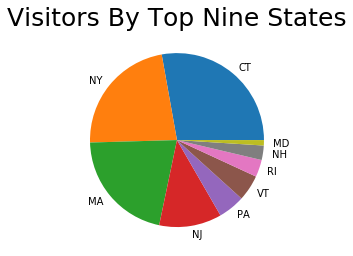

In [119]:
# Here the the top nine states that visit the mountain
df.purchaser_state.value_counts()[0:9].plot(kind='pie')
plt.ylabel("",fontsize=18)
plt.title('Visitors By Top Nine States', fontsize=25)
plt.show()

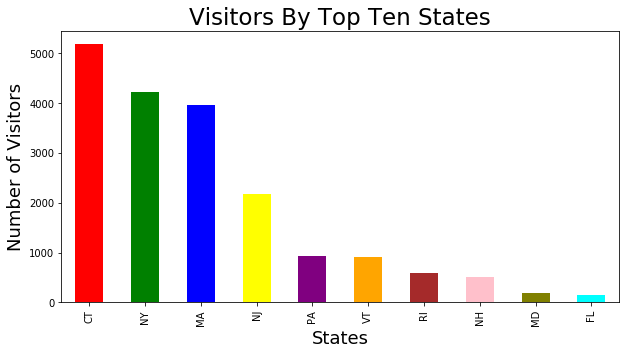

In [120]:
# Sometimes bar graphs are easier to read.
my_colors = list(['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'brown',
                  'pink', 'olive', 'cyan'])  
df.purchaser_state.value_counts()[0:10].plot(kind='bar',color=my_colors, figsize=(10,5))
plt.xlabel("States", fontsize=18)
plt.ylabel("Number of Visitors",fontsize=18)
plt.title('Visitors By Top Ten States', fontsize=23)
plt.show()

In [121]:
# Looks like almost all fifty states visit Magic!
df.purchaser_state.value_counts().count()

48

In [122]:
# There are a lot of missing values...
df.purchaser_state.isnull().sum()

64

In [123]:
#pip install pywaffle

In [124]:
from pywaffle import Waffle 

In [125]:
state_numbers = df.purchaser_state.value_counts()[0:10]

In [126]:
state_numbers.head()

CT    5191
NY    4224
MA    3968
NJ    2169
PA     924
Name: purchaser_state, dtype: int64

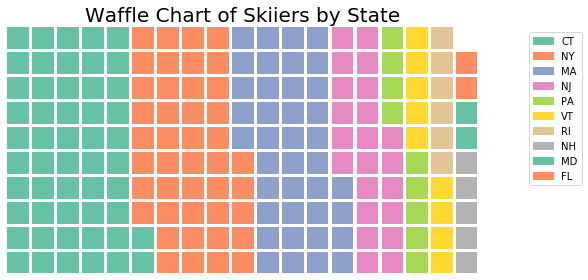

In [127]:
# To plot the waffle Chart 
fig = plt.figure(FigureClass = Waffle, rows=10, values = list(state_numbers.values/100), 
                 labels=list(state_numbers.index), figsize=(10,4), 
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
                 title= {'label': 'Waffle Chart of Skiiers by State', 'size': 20})

In [128]:
state_numbers.sum()

18820

In [129]:
state_numbers.sum()/188.72

99.72445951674439

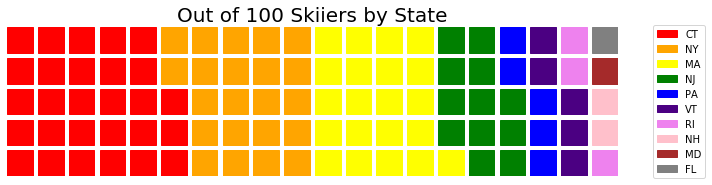

In [130]:
# Waffle Chart out of 100
fig = plt.figure(FigureClass = Waffle, rows=5, values = list(state_numbers.values/188.72), 
                 labels=list(state_numbers.index), figsize=(10,5), 
                 colors=('red', 'orange', 'yellow', 'green', 'blue','indigo',
                         'violet', 'pink', 'brown', 'gray'), 
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1.05)},
                 title= {'label': 'Out of 100 Skiiers by State', 'size': 20})

***Here is a fun way to show the number of skiiers by the top states***

## Trying to fill those missing values from another dataset

In [131]:
# Zip code info from zipcode database
# https://www.unitedstateszipcodes.org/zip-code-database/

state_codes = pd.read_csv("Data_Folder/zip_code_database.csv")
state_codes.head()

zip      type  decommissioned primary_city acceptable_cities  \
0  501    UNIQUE               0   Holtsville               NaN   
1  544    UNIQUE               0   Holtsville               NaN   
2  601  STANDARD               0     Adjuntas               NaN   
3  602  STANDARD               0       Aguada               NaN   
4  603  STANDARD               0    Aguadilla             Ramey   

                                 unacceptable_cities state  \
0                               I R S Service Center    NY   
1                                 Irs Service Center    NY   
2  Colinas Del Gigante, Jard De Adjuntas, Urb San...    PR   
3  Alts De Aguada, Bo Guaniquilla, Comunidad Las ...    PR   
4  Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...    PR   

                county             timezone area_codes world_region country  \
0       Suffolk County     America/New_York        631          NaN      US   
1       Suffolk County     America/New_York        631          NaN      US   
2   Adjuntas Municipio  America/Puerto_Rico    787,939          NaN      US   
3     Aguada Municipio  America/Puerto_Rico    787,939          NaN      US   
4  Aguadilla Municipio  America/Puerto_Rico        787          NaN      US   

   latitude  longitude  irs_estimated_population_2015  
0     40.81     -73.04                            562  
1     40.81     -73.04                              0  
2     18.16     -66.72                              0  
3     18.38     -67.18                              0  
4     18.43     -67.15                              0

In [132]:
# I just want the zipcodes and the lat/lon
state_codes = state_codes.filter(['zip', 'primary_city', 'state', 'latitude',
                                  'longitude'], axis=1)
state_codes.head()

zip primary_city state  latitude  longitude
0  501   Holtsville    NY     40.81     -73.04
1  544   Holtsville    NY     40.81     -73.04
2  601     Adjuntas    PR     18.16     -66.72
3  602       Aguada    PR     18.38     -67.18
4  603    Aguadilla    PR     18.43     -67.15

In [133]:
# Merge the lat and lon with my original dataframe
df_skiiers = df.merge(state_codes, left_on='purchaser_zip', right_on='zip')
df_skiiers.head()

order_id order_status                              product  \
0  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10402020.0         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store order_date  trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
1           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
2  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
3           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
4           Adult    Liftopia.com 2017-01-23 2017-01-28               No   

     purchaser_address purchaser_city  ... purchaser_zip  purchaser_country  \
0  23 Jefferson Circle        Clinton  ...          6413                 US   
1  23 Jefferson Circle        Clinton  ...          6413                 US   
2  23 Jefferson Circle        Clinton  ...          6413                 US   
3  23 Jefferson Circle        Clinton  ...          6413                 US   
4                  NaN        Clinton  ...          6413                 US   

  net_rate_revenue  currency order_to_trip_days   zip  primary_city state  \
0            50.21       USD                 50  6413       Clinton    CT   
1            69.74       USD                 50  6413       Clinton    CT   
2            50.21       USD                 50  6413       Clinton    CT   
3            69.74       USD                 50  6413       Clinton    CT   
4            40.79       USD                  5  6413       Clinton    CT   

  latitude  longitude  
0    41.27     -72.53  
1    41.27     -72.53  
2    41.27     -72.53  
3    41.27     -72.53  
4    41.27     -72.53  

[5 rows x 21 columns]

In [134]:
# Get rid of the unnecessary categorical columns
df_skiiers = df_skiiers.drop(['order_status', 'marketing_opt_in', 'purchaser_country',
                              'currency'], axis=1)

In [135]:
# Which ones are missing values?
df_skiiers[df_skiiers.purchaser_state.isnull()].head()

order_id                              product     ticket_type  \
1022  12437415.0  Magic Mountain | 2 Day Lift Tickets           Adult   
1023  12437415.0  Magic Mountain | 2 Day Lift Tickets           Adult   
1562  12187666.0  Magic Mountain | 1 Day Lift Tickets           Adult   
1598  13694677.0  Magic Mountain | 1 Day Lift Tickets           Adult   
3455  13697167.0  Magic Mountain | 1 Day Lift Tickets  Youth / Senior   

               store order_date  trip_date     purchaser_address  \
1022  Magic Mountain 2019-02-15 2019-02-16  390 Metropolitan Ave   
1023  Magic Mountain 2019-02-15 2019-02-16  390 Metropolitan Ave   
1562  Magic Mountain 2019-01-19 2019-01-20         343 Sperry Rd   
1598    Liftopia.com 2020-01-24 2020-01-25                   NaN   
3455  Magic Mountain 2020-01-24 2020-01-25        105 East Court   

     purchaser_city purchaser_state  purchaser_zip  net_rate_revenue  \
1022       Brooklyn             NaN          11211            117.17   
1023       Brooklyn             NaN          11211            117.17   
1562        Bethany             NaN           6524             68.82   
1598     Brookfield             NaN           6804             50.99   
3455   Wading River             NaN          11792             41.84   

      order_to_trip_days    zip  primary_city state  latitude  longitude  
1022                   1  11211      Brooklyn    NY     40.71     -73.95  
1023                   1  11211      Brooklyn    NY     40.71     -73.95  
1562                   1   6524       Bethany    CT     41.42     -72.99  
1598                   1   6804    Brookfield    CT     41.46     -73.39  
3455                   1  11792  Wading River    NY     40.94     -72.81

In [136]:
# Use the state data from other dataset to fill Nan's
df.purchaser_state.fillna(df_skiiers.state, inplace=True)

In [137]:
# Not sure why it didn't work on all of them
df.purchaser_state.isnull().sum()

6

In [138]:
# Can't figure out why these didn't fill
df[df.purchaser_state.isnull()]

order_id order_status                              product  \
19808  14136994.0         PAID      Magic Mountain | All Day Tubing   
20039  14179376.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20040  14179376.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20041  14179376.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20285  14220109.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20346  14235476.0         PAID  Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
19808        All Ages  Magic Mountain 2020-02-26 2020-02-29               No   
20039           Adult  Magic Mountain 2020-03-01 2020-03-06               No   
20040  Youth / Senior  Magic Mountain 2020-03-01 2020-03-06               No   
20041  Youth / Senior  Magic Mountain 2020-03-01 2020-03-06               No   
20285           Adult  Magic Mountain 2020-03-06 2020-03-07               No   
20346           Adult  Magic Mountain 2020-03-07 2020-03-08               No   

            purchaser_address purchaser_city purchaser_state  purchaser_zip  \
19808          63 Pleasant St       Winthrop             NaN           2152   
20039     7 Driftway Point Rd        Danbury             NaN           6811   
20040     7 Driftway Point Rd        Danbury             NaN           6811   
20041     7 Driftway Point Rd        Danbury             NaN           6811   
20285  2754 S Linebarger Terr      Milwaukee             NaN          53207   
20346     150 Furnace Hill Rd       Cheshire             NaN           1225   

      purchaser_country  net_rate_revenue currency  order_to_trip_days  
19808                US             23.24      USD                   3  
20039                US             42.77      USD                   5  
20040                US             26.03      USD                   5  
20041                US             27.89      USD                   5  
20285                US             57.65      USD                   1  
20346                US             53.00      USD                   1

#### By address

In [139]:
# Missing a lot of data here... Maybe Liftopia doesn't require an address?
df.purchaser_address.count()

14111

In [140]:
# Look at 'store'
df.store.value_counts()

Magic Mountain    14113
Liftopia.com       5559
Name: store, dtype: int64

In [141]:
# Are these repeat buyers or are they group purchases?
df.purchaser_address.value_counts()

733 PROSPECT ST               33
8 Kane Road                   28
136 Rhodes Road               25
456 Jones Hollow Road         23
209 old kings hwy North       22
                              ..
80 Warren St, Apt 50           1
75 silvermine rd               1
5902 Printery Street, #102     1
825 County Route 77            1
370 River Rd                   1
Name: purchaser_address, Length: 5802, dtype: int64

In [142]:
# Looks like most addresses have two purchases
df.purchaser_address.value_counts().median()

2.0

In [143]:
# Look at the mean as well
df.purchaser_address.value_counts().mean()

2.432092381937263

In [144]:
# This is one of the address with multiple purchases
df.loc[df.purchaser_address == "733 PROSPECT ST"]

order_id order_status                                      product  \
8902   11985146.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9597   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9598   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9599   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9600   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9601   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
11286  12307849.0         PAID          Magic Mountain | 2 Day Lift Tickets   
11287  12307849.0         PAID          Magic Mountain | 2 Day Lift Tickets   
11288  12307849.0         PAID          Magic Mountain | 2 Day Lift Tickets   
11289  12307949.0         PAID          Magic Mountain | 1 Day Lift Tickets   
12123  12436611.0         PAID          Magic Mountain | 1 Day Lift Tickets   
12124  12436611.0         PAID          Magic Mountain | 1 Day Lift Tickets   
12125  12436611.0         PAID          Magic Mountain | 1 Day Lift Tickets   
13178  12554825.0         PAID          Magic Mountain | 1 Day Lift Tickets   
13179  12554825.0         PAID          Magic Mountain | 1 Day Lift Tickets   
13182  12555015.0         PAID  Magic Mountain | 1 Day Lift Ticket + Tubing   
16884  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16885  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16886  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16887  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16888  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17583  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17584  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17585  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17586  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17587  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
18261  13927628.0         PAID          Magic Mountain | 1 Day Lift Tickets   
18262  13927628.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20100  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20101  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20102  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20103  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20104  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
8902            Adult  Magic Mountain 2018-12-29 2018-12-31              Yes   
9597            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9598            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9599            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9600            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9601   Youth / Senior  Magic Mountain 2019-01-13 2019-01-27              Yes   
11286           Adult  Magic Mountain 2019-02-01 2019-02-09              Yes   
11287           Adult  Magic Mountain 2019-02-01 2019-02-09              Yes   
11288  Youth / Senior  Magic Mountain 2019-02-01 2019-02-09              Yes   
11289           Adult  Magic Mountain 2019-02-01 2019-02-09              Yes   
12123           Adult  Magic Mountain 2019-02-15 2019-02-19              Yes   
12124           Adult  Magic Mountain 2019-02-15 2019-02-19              Yes   
12125  Youth / Senior  Magic Mountain 2019-02-15 2019-02-19              Yes   
13178           Adult  Magic Mountain 2019-02-27 2019-03-03              Yes   
13179           Adult  Magic Mountain 2019-02-27 2019-03-03              Yes   
13182  Youth / Senior  Magic Mountain 2019

In [145]:
df.loc[df.purchaser_address == "8 Kane Road"]

order_id order_status                                      product  \
3107   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3108   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3109   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3110   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3111   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3112   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3113   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3114   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3115   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3116   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3117   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3118   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
5271   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5272   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5273   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5274   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5275   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5276   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15595  13301855.0         PAID  Magic Mountain | 1 Day Lift Ticket + Rental   
15596  13301855.0         PAID  Magic Mountain | 1 Day Lift Ticket + Rental   
15597  13301954.0         PAID              Magic Mountain | All Day Tubing   
15598  13301954.0         PAID              Magic Mountain | All Day Tubing   
15599  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15600  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15601  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15602  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15603  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15604  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
3107            Adult  Magic Mountain 2017-12-20 2017-12-24              Yes   
3108            Adult  Magic Mountain 2017-12-20 2017-12-24              Yes   
3109   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3110   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3111   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3112   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3113            Adult  Magic Mountain 2017-12-20 2017-12-26              Yes   
3114            Adult  Magic Mountain 2017-12-20 2017-12-26              Yes   
3115   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
3116   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
3117   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
3118   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
5271            Adult  Magic Mountain 2018-02-14 2018-02-17              Yes   
5272            Adult  Magic Mountain 2018-02-14 2018-02-17              Yes   
5273   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
5274   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
5275   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
5276   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
15595           Adult  Magic Mountain 2019-12-28 2019-12-30              Yes   
15596  Youth / Senior  Magic Mountain 2019-12-28 2019-12-30              Yes   
15597        All Ages  Magic Mountain

In [146]:
df.loc[df.purchaser_address == "136 Rhodes Road"]

order_id order_status                              product  \
968   10505969.0         PAID  Magic Mountain | 1 Day Lift Tickets   
4801  11290278.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5052  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5053  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5054  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5055  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5676  11448526.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5677  11448526.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6189  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6190  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6191  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6192  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6834  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6835  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6836  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6837  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7208  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7209  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7210  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7211  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7212  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7438  11624094.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7439  11624094.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7527  11642636.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7528  11642636.0         PAID  Magic Mountain | 1 Day Lift Tickets   

         ticket_type           store order_date  trip_date marketing_opt_in  \
968            Adult  Magic Mountain 2017-02-09 2017-02-10              Yes   
4801           Adult  Magic Mountain 2018-02-06 2018-02-08              Yes   
5052           Adult  Magic Mountain 2018-02-08 2018-02-10              Yes   
5053           Adult  Magic Mountain 2018-02-08 2018-02-10              Yes   
5054  Youth / Senior  Magic Mountain 2018-02-08 2018-02-10              Yes   
5055  Youth / Senior  Magic Mountain 2018-02-08 2018-02-10              Yes   
5676           Adult  Magic Mountain 2018-03-02 2018-03-03              Yes   
5677  Youth / Senior  Magic Mountain 2018-03-02 2018-03-03              Yes   
6189           Adult  Magic Mountain 2018-03-08 2018-03-10              Yes   
6190           Adult  Magic Mountain 2018-03-08 2018-03-10              Yes   
6191  Youth / Senior  Magic Mountain 2018-03-08 2018-03-10              Yes   
6192  Youth / Senior  Magic Mountain 2018-03-08 2018-03-10              Yes   
6834           Adult  Magic Mountain 2018-03-15 2018-03-17              Yes   
6835           Adult  Magic Mountain 2018-03-15 2018-03-17              Yes   
6836  Youth / Senior  Magic Mountain 2018-03-15 2018-03-17              Yes   
6837  Youth / Senior  Magic Mountain 2018-03-15 2018-03-17              Yes   
7208           Adult  Magic Mountain 2018-03-21 2018-03-23              Yes   
7209           Adult  Magic Mountain 2018-03-21 2018-03-23              Yes   
7210           Adult  Magic Mountain 2018-03-21 2018-03-23              Yes   
7211  Youth / Senior  Magic Mountain 2018-03-21 2018-03-23              Yes   
7212  Youth / Senior  Magic Mountain 2018-03-21 2018-03-23              Yes   
7438           Adult  Magic Mountain 2018-03-30 2018-03-31              Yes   
7439  Youth / Senior  Magic Mountain 2018-03-30 2018-03-31              Yes   
7527           Adult  Magic Mountain 2018-04-05 2018-04-07              Yes   
7528  Youth / Senior  Magic Mountain 2018-04-05 2018-04-07              Yes   

     purchaser_address purchaser_city purchaser_state  purchaser_zip  \
968    136 Rhodes Road        Tolland              CT       

#### Revenue

In [147]:
# Look at ticket sales
df.net_rate_revenue.describe()

count    19672.000000
mean        51.210320
std         23.840826
min          1.860000
25%         38.120000
50%         47.420000
75%         57.650000
max        261.320000
Name: net_rate_revenue, dtype: float64

In [148]:
# Break up the two stores into two df's
liftopia = df[df.store == 'Liftopia.com']

In [149]:
# Second df
magic = df[df.store == 'Magic Mountain']

In [150]:
# Tickets from 'Liftopia'
liftopia.net_rate_revenue.describe()

count    5559.000000
mean       45.559579
std        18.619888
min        13.590000
25%        34.840000
50%        43.340000
75%        50.990000
max       194.640000
Name: net_rate_revenue, dtype: float64

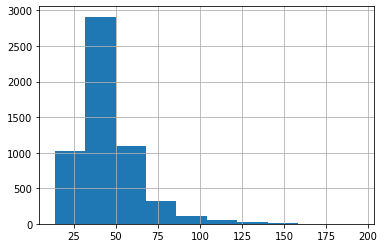

In [151]:
# Histogram of ticket prices
liftopia.net_rate_revenue.hist()

In [152]:
# Now for other df
magic.net_rate_revenue.describe()

count    14113.000000
mean        53.436102
std         25.262679
min          1.860000
25%         39.050000
50%         50.210000
75%         59.510000
max        261.320000
Name: net_rate_revenue, dtype: float64

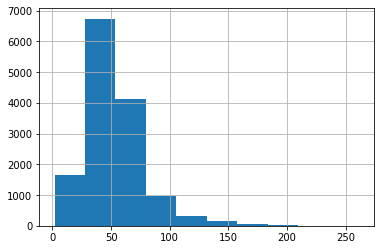

In [153]:
# The other store histogram
magic.net_rate_revenue.hist()

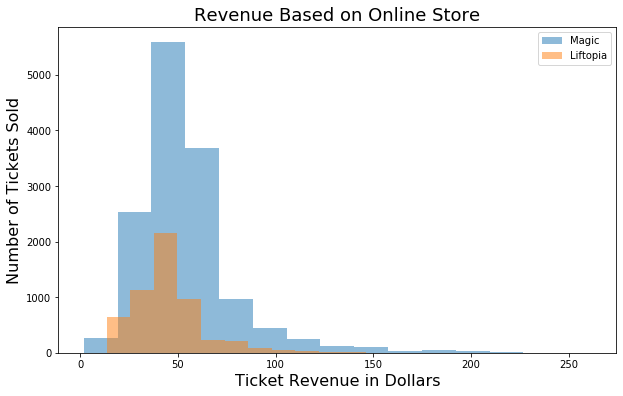

In [154]:
plt.figure(figsize=(10,6))
plt.hist(magic.net_rate_revenue, bins=15, alpha=0.5, label="Magic")
plt.hist(liftopia.net_rate_revenue, bins=15, alpha=0.5, label="Liftopia")
plt.xlabel("Ticket Revenue in Dollars", size=16)
plt.ylabel("Number of Tickets Sold", size=16)
plt.title("Revenue Based on Online Store", size=18)
plt.legend(loc='upper right')

***It makes sense that they make more money from their own online store instead of
the outside vendor***

## Sales By Year

In [155]:
# Trying to seperate by year - NOT WORKING!
#df['2017'] = df[df['trip_date'] == '2017']

In [156]:
years = [df_2017.shape, df_2018.shape, df_2019.shape, df_2020.shape]

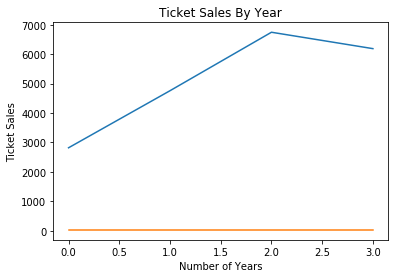

In [157]:
import matplotlib.pyplot as plt
plt.plot(years)
plt.xlabel('Number of Years')
plt.ylabel('Ticket Sales')
plt.title('Ticket Sales By Year')
plt.show()

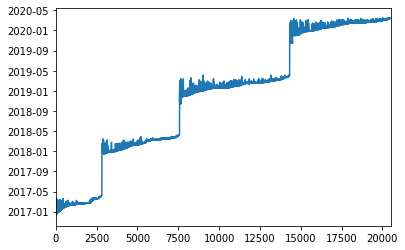

In [158]:
df.trip_date.plot()

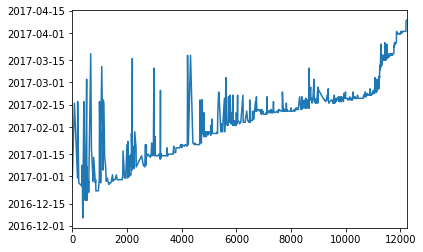

In [159]:
skiiers_2017_zipcodes.trip_date.plot()

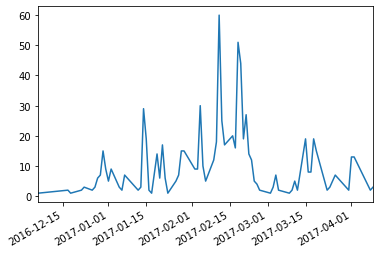

In [160]:
skiiers_2017_zipcodes.trip_date.value_counts().plot()

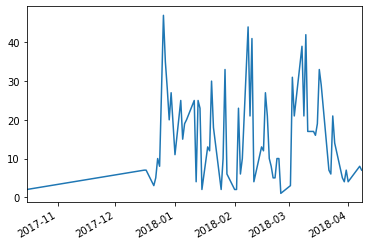

In [161]:
skiiers_2018_zipcodes.trip_date.value_counts().plot()

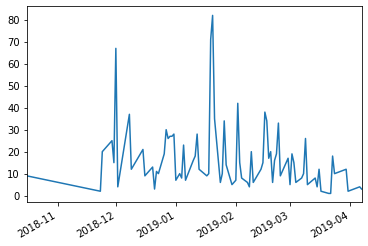

In [162]:
skiiers_2019_zipcodes.trip_date.value_counts().plot()

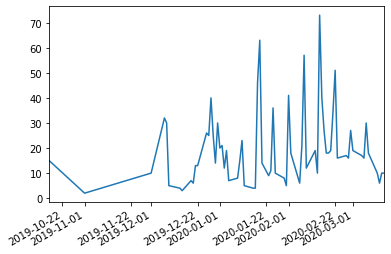

In [163]:
skiiers_2020_zipcodes.trip_date.value_counts().plot()

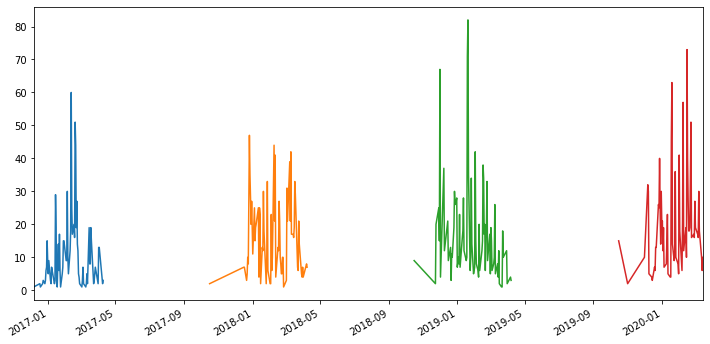

In [164]:
plt.figure(figsize=(12,6))
skiiers_2017_zipcodes.trip_date.value_counts().plot()
skiiers_2018_zipcodes.trip_date.value_counts().plot()
skiiers_2019_zipcodes.trip_date.value_counts().plot()
skiiers_2020_zipcodes.trip_date.value_counts().plot()

In [165]:
# Trying to get a graph of overlapping years...

#fig, ax1, ax2 = plt.subplots(1, 1, figsize = (12, 6))
#ax1 = skiiers_2017_zipcodes.trip_date.value_counts().plot()
#ax2 = skiiers_2018_zipcodes.trip_date.value_counts().plot()

#fig, ax1, ax2 = plt.subplots(1, 1, figsize = (12, 6))
#ax1.plot(skiiers_2017_zipcodes.trip_date.value_counts())
#ax2.plot(skiiers_2018_zipcodes.trip_date.value_counts())

In [166]:
df_by_year = df.copy()
df_by_year.set_index('trip_date', inplace=True)
df_by_year.head()

order_id order_status                              product  \
trip_date                                                                  
2016-12-31  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2016-12-31  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2016-12-31  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2016-12-31  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2017-02-16  10098733.0         PAID  Magic Mountain | 1 Day Lift Tickets   

               ticket_type           store order_date marketing_opt_in  \
trip_date                                                                
2016-12-31  Youth / Senior  Magic Mountain 2016-11-11              Yes   
2016-12-31           Adult  Magic Mountain 2016-11-11              Yes   
2016-12-31  Youth / Senior  Magic Mountain 2016-11-11              Yes   
2016-12-31           Adult  Magic Mountain 2016-11-11              Yes   
2017-02-16           Adult    Liftopia.com 2016-11-15               No   

              purchaser_address purchaser_city purchaser_state  purchaser_zip  \
trip_date                                                                       
2016-12-31  23 Jefferson Circle        Clinton              CT           6413   
2016-12-31  23 Jefferson Circle        Clinton              CT           6413   
2016-12-31  23 Jefferson Circle        Clinton              CT           6413   
2016-12-31  23 Jefferson Circle        Clinton              CT           6413   
2017-02-16                  NaN       Guilford              VT           5301   

           purchaser_country  net_rate_revenue currency  order_to_trip_days  
trip_date                                                                    
2016-12-31                US             50.21      USD                  50  
2016-12-31                US             69.74      USD                  50  
2016-12-31                US             50.21      USD                  50  
2016-12-31                US             69.74      USD                  50  
2017-02-16                US             19.54      USD                  93

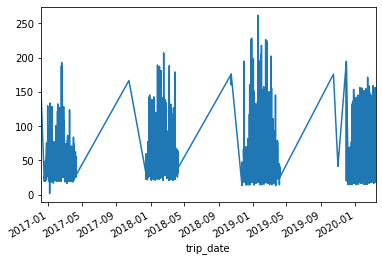

In [167]:
df_by_year.net_rate_revenue.plot()

In [168]:
# No idea what I'm doing?
df_rev_sum = df_by_year.groupby('trip_date').aggregate({'net_rate_revenue':'sum'})
df_rev_sum.head()

# I just want the net_rate_rev and trip_date
#df_by_rev = df_by_rev.filter(['trip_date','net_rate_revenue', axis=1)
#df_by_rev.head()

net_rate_revenue
trip_date                   
2016-12-06            304.30
2016-12-17             60.50
2016-12-18             46.73
2016-12-22            152.50
2016-12-23            126.89

In [169]:
df_rev_sum.describe()

net_rate_revenue
count        298.000000
mean        3380.568490
std         4178.778459
min           18.590000
25%          773.205000
50%         1974.250000
75%         4219.325000
max        28921.060000

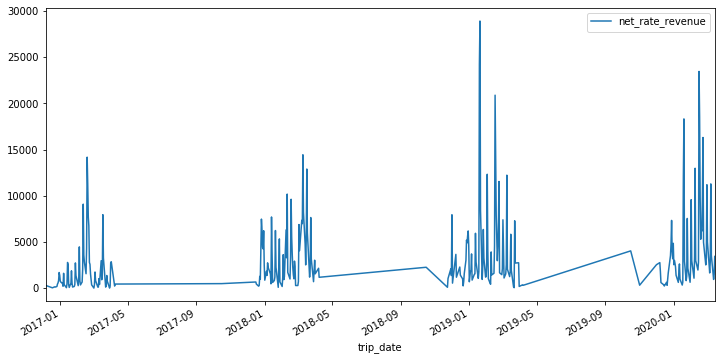

In [170]:
df_rev_sum.plot(figsize=(12,6))

In [171]:
df_rev_mean = df_by_year.groupby('trip_date').aggregate({'net_rate_revenue':'mean'})
df_rev_mean.head()

net_rate_revenue
trip_date                   
2016-12-06        152.150000
2016-12-17         30.250000
2016-12-18         23.365000
2016-12-22         25.416667
2016-12-23         25.378000

In [172]:
df_rev_mean.describe()

net_rate_revenue
count        298.000000
mean          47.248813
std           20.321516
min           14.974286
25%           36.269688
50%           46.196825
75%           53.334888
max          181.943571

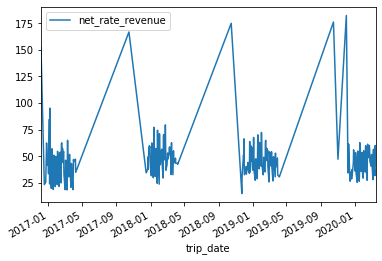

In [173]:
df_rev_mean.plot()

# Models

## Model 1 - Basic KMeans Cluster

In [174]:
df.head()

order_id order_status                              product  \
0  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733.0         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store order_date  trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
1           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
2  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
3           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
4           Adult    Liftopia.com 2016-11-15 2017-02-16               No   

     purchaser_address purchaser_city purchaser_state  purchaser_zip  \
0  23 Jefferson Circle        Clinton              CT           6413   
1  23 Jefferson Circle        Clinton              CT           6413   
2  23 Jefferson Circle        Clinton              CT           6413   
3  23 Jefferson Circle        Clinton              CT           6413   
4                  NaN       Guilford              VT           5301   

  purchaser_country  net_rate_revenue currency  order_to_trip_days  
0                US             50.21      USD                  50  
1                US             69.74      USD                  50  
2                US             50.21      USD                  50  
3                US             69.74      USD                  50  
4                US             19.54      USD                  93

In [175]:
df_magic = df[df.store == "Magic Mountain"]

In [176]:
df_magic.order_status.value_counts()

PAID         13799
CANCELLED      314
Name: order_status, dtype: int64

In [177]:
df_magic = df_magic[df_magic.order_status == "PAID"]

In [178]:
df_magic = df_magic.drop(["purchaser_country", "currency", "marketing_opt_in", "store", "order_status"], axis=1)

In [179]:
df_magic.isnull().sum()

order_id              0
product               0
ticket_type           0
order_date            0
trip_date             0
purchaser_address     2
purchaser_city        0
purchaser_state       6
purchaser_zip         0
net_rate_revenue      0
order_to_trip_days    0
dtype: int64

In [180]:
df_magic = df_magic.dropna()

In [181]:
df_magic.isnull().sum()

order_id              0
product               0
ticket_type           0
order_date            0
trip_date             0
purchaser_address     0
purchaser_city        0
purchaser_state       0
purchaser_zip         0
net_rate_revenue      0
order_to_trip_days    0
dtype: int64

In [182]:
df_magic.head()

order_id                              product ticket_type order_date  \
15  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
16  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
23  10110579.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
24  10110581.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
27  10115147.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-29   

    trip_date     purchaser_address  purchaser_city purchaser_state  \
15 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
16 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
23 2017-01-08       205 Chapin Road         Hampden              MA   
24 2017-02-12       205 Chapin Road         Hampden              MA   
27 2017-02-17      332 Jefferson Ct           Brick              NJ   

    purchaser_zip  net_rate_revenue  order_to_trip_days  
15           8742            118.10                  86  
16           8742            118.10                  86  
23           1036             36.26                  41  
24           1036             38.12                  76  
27           8724            120.89                  80

In [183]:
df_magic_numeric = df_magic.drop(["purchaser_address", "product", "ticket_type",
                                "order_date", 'purchaser_state', 'purchaser_city'],
                               axis=1)

In [184]:
df_magic_numeric.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  order_to_trip_days
15  10105009.0 2017-02-17           8742            118.10                  86
16  10105009.0 2017-02-17           8742            118.10                  86
23  10110579.0 2017-01-08           1036             36.26                  41
24  10110581.0 2017-02-12           1036             38.12                  76
27  10115147.0 2017-02-17           8724            120.89                  80

In [185]:
df_magic_numeric['trip_date'] = pd.to_datetime(df_magic_numeric['trip_date'])
df_magic_numeric['trip_date'] = df_magic_numeric['trip_date'].map(dt.datetime.toordinal)

In [186]:
df_magic_numeric.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  order_to_trip_days
15  10105009.0     736377           8742            118.10                  86
16  10105009.0     736377           8742            118.10                  86
23  10110579.0     736337           1036             36.26                  41
24  10110581.0     736372           1036             38.12                  76
27  10115147.0     736377           8724            120.89                  80

In [187]:
from sklearn.cluster import KMeans

In [188]:
kmeans_model_1 = KMeans(n_clusters=2)

In [189]:
kmeans_model_1.fit(df_magic_numeric)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [190]:
labels = kmeans_model_1.predict(df_magic_numeric)
centroids = kmeans_model_1.cluster_centers_

In [191]:
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [192]:
centroids

array([[1.36142017e+07, 7.37422642e+05, 8.86071393e+03, 5.26856801e+01,
        8.63355317e+00],
       [1.15662315e+07, 7.36826952e+05, 8.63696733e+03, 5.41972469e+01,
        5.80031323e+00]])

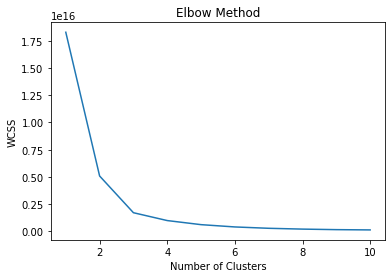

In [193]:
wcss = []
for i in range(1, 11):
    kmeans_model_1 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_model_1.fit(df_magic_numeric)
    wcss.append(kmeans_model_1.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From this model I first learned that the datetime column needed to be in an ordinal format. I also learned that for the KMeans Cluster Model I couldn't include any of the categorical variables as they are. Using the "Within Cluster Sum of Squares" (WCSS) list I was able to determine the optimum number of clusters from the Elbow Graph.

## Model 2 - KMeans Cluster (With only Two Variables)

In [194]:
df_magic.head()

order_id                              product ticket_type order_date  \
15  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
16  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
23  10110579.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
24  10110581.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
27  10115147.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-29   

    trip_date     purchaser_address  purchaser_city purchaser_state  \
15 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
16 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
23 2017-01-08       205 Chapin Road         Hampden              MA   
24 2017-02-12       205 Chapin Road         Hampden              MA   
27 2017-02-17      332 Jefferson Ct           Brick              NJ   

    purchaser_zip  net_rate_revenue  order_to_trip_days  
15           8742            118.10                  86  
16           8742            118.10                  86  
23           1036             36.26                  41  
24           1036             38.12                  76  
27           8724            120.89                  80

In [195]:
df_magic_2 = df_magic.drop(["purchaser_address", "product", "ticket_type",
                            "purchaser_state", "purchaser_city", "order_to_trip_days",
                            "order_id", "order_date", "net_rate_revenue"], axis=1)

In [196]:
df_magic_2['trip_date'] = pd.to_datetime(df_magic_2['trip_date'])
df_magic_2['trip_date'] = df_magic_2['trip_date'].map(dt.datetime.toordinal)

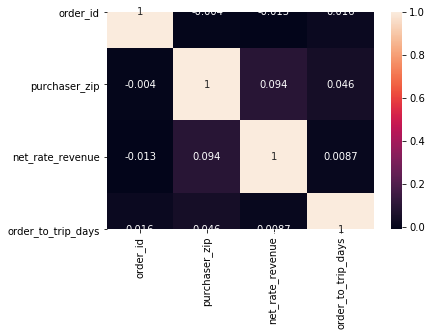

In [197]:
import seaborn as sns 

# generating correlation heatmap 
sns.heatmap(df_magic.corr(), annot = True) 
  
# posting correlation heatmap to output console  
plt.show() 

In [198]:
df_magic_2['purchaser_zip'].describe()

count    13791.000000
mean      8715.686680
std       9749.965019
min         47.000000
25%       3797.500000
50%       6524.000000
75%      10915.000000
max      97759.000000
Name: purchaser_zip, dtype: float64

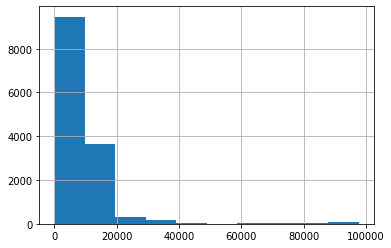

In [199]:
df_magic_2['purchaser_zip'].hist()

In [358]:
# Do I need to get rid of outliers?
df_magic_2['purchaser_zip'].mean()+3*df_magic_2['purchaser_zip'].std()

42969.49293031013

In [359]:
df_magic_2.head()

trip_date  purchaser_zip            1             2            3  \
104     736377          18966  8996.063477  16919.294331  6690.035424   
105     736377          18966  8996.063477  16919.294331  6690.035424   
106     736377          18966  8996.063477  16919.294331  6690.035424   
123     736378          19067  9096.719615  17020.181832  6790.477154   
124     736378          19067  9096.719615  17020.181832  6790.477154   

     Cluster             4             5             6            7  
104        7  60327.841909  13243.567062  12096.192398  4103.500272  
105        7  60327.841909  13243.567062  12096.192398  4103.500272  
106        7  60327.841909  13243.567062  12096.192398  4103.500272  
123        7  60226.836978  13344.406076  12196.977797  4003.800115  
124        7  60226.836978  13344.406076  12196.977797  4003.800115

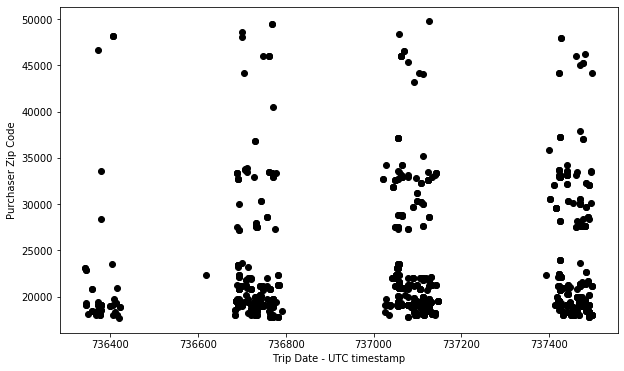

In [360]:
X = df_magic_2[["trip_date", "purchaser_zip"]]
#Visualise data points
plt.figure(figsize=(10,6))
plt.scatter(X["trip_date"], X["purchaser_zip"], c='black')
plt.xlabel('Trip Date - UTC timestamp')
plt.ylabel('Purchaser Zip Code')
plt.show()

In [361]:
# Number of clusters
K=3

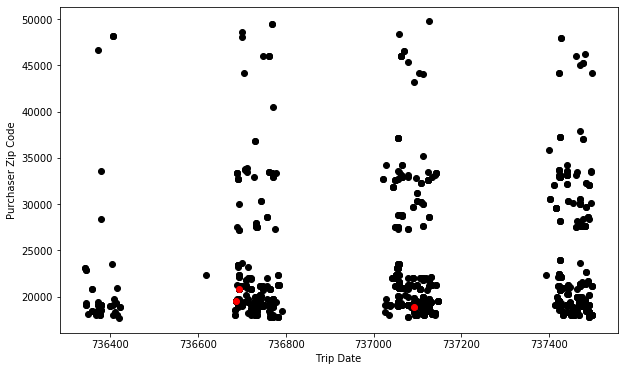

In [362]:
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(10,6))
plt.scatter(X["trip_date"], X["purchaser_zip"],c='black')
plt.scatter(Centroids["trip_date"],Centroids["purchaser_zip"],c='red')
plt.xlabel('Trip Date')
plt.ylabel('Purchaser Zip Code')
plt.show()

In [205]:
# Assign all the points to the closest cluster centroid
# Recompute centroids of newly formed clusters
# Repeat, reducing cluster standard dev

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["trip_date"]-row_d["trip_date"])**2
            d2=(row_c["purchaser_zip"]-row_d["purchaser_zip"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["trip_date","purchaser_zip"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = ((Centroids_new['trip_date'] - Centroids['trip_date']).sum() + 
        (Centroids_new['purchaser_zip'] - Centroids['purchaser_zip']).sum())
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["trip_date","purchaser_zip"]]

9265.88885184237
3556.159516738946
9646.233250585567
11949.336395684606
7816.748674916882
13776.200574777766
5978.162622565644
1194.3542864940373
0.0


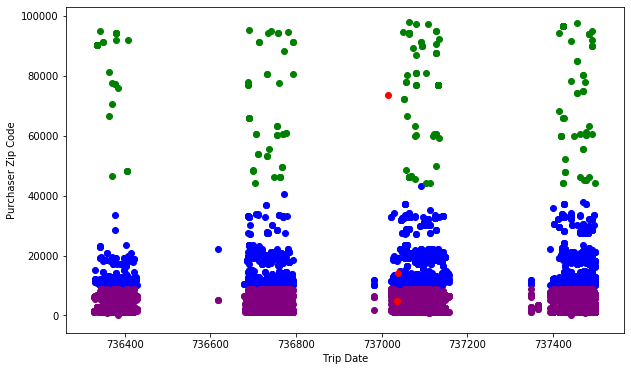

In [206]:
color=['blue','green','purple']
plt.figure(figsize=(10,6))
for k in range(K):
    df_magic_2=X[X["Cluster"]==k+1]
    plt.scatter(df_magic_2["trip_date"], df_magic_2["purchaser_zip"],c=color[k])
plt.scatter(Centroids["trip_date"],Centroids["purchaser_zip"],c='red')
plt.xlabel('Trip Date')
plt.ylabel('Purchaser Zip Code')
plt.show()

Using only the 'zipcode' and the 'trip date' my KMeans model give a nice visual but I don't think it really tells us anything. The model is just classifying by zip code - the purple colors are the zip codes that are closer to the resort and the green ones are the zip codes further away. Plus, it just put the three cluster centers all in the same year.

In [208]:
# Try again with more clusters

In [209]:
# Number of clusters
K=7

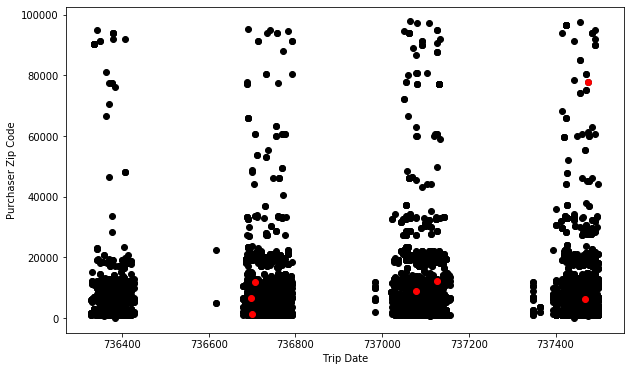

In [210]:
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(10,6))
plt.scatter(X["trip_date"], X["purchaser_zip"],c='black')
plt.scatter(Centroids["trip_date"],Centroids["purchaser_zip"],c='red')
plt.xlabel('Trip Date')
plt.ylabel('Purchaser Zip Code')
plt.show()

In [211]:
# Assign all the points to the closest cluster centroid
# Recompute centroids of newly formed clusters
# Repeat, reducing cluster standard dev

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["trip_date"]-row_d["trip_date"])**2
            d2=(row_c["purchaser_zip"]-row_d["purchaser_zip"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["trip_date","purchaser_zip"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = ((Centroids_new['trip_date'] - Centroids['trip_date']).sum() + 
        (Centroids_new['purchaser_zip'] - Centroids['purchaser_zip']).sum())
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["trip_date","purchaser_zip"]]

5243.492269117503
4431.552173378168
1493.283293386718
77.01520491910378
28.914039214033437
323.86698141217767
577.9237063296814
208.807887404736
151.553361373989
124.80728175259537
10.058878941714283
0.0


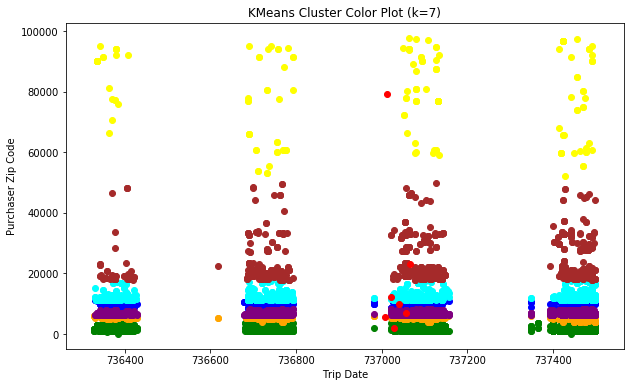

In [212]:
# With 7 Clusters
color=['blue','green','cyan','yellow','orange','purple','brown']
plt.figure(figsize=(10,6))
for k in range(K):
    df_magic_2=X[X["Cluster"]==k+1]
    plt.scatter(df_magic_2["trip_date"], df_magic_2["purchaser_zip"],c=color[k])
plt.scatter(Centroids["trip_date"],Centroids["purchaser_zip"],c='red')
plt.title('KMeans Cluster Color Plot (k=7)')
plt.xlabel('Trip Date')
plt.ylabel('Purchaser Zip Code')
plt.show()

In [213]:
# Pretty much the same thing, by zip code of course

## Model 3 - Scaled Data

In [214]:
df_magic_numeric.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  order_to_trip_days
15  10105009.0     736377           8742            118.10                  86
16  10105009.0     736377           8742            118.10                  86
23  10110579.0     736337           1036             36.26                  41
24  10110581.0     736372           1036             38.12                  76
27  10115147.0     736377           8724            120.89                  80

In [215]:
df_magic_3 = df_magic_numeric

In [216]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_magic_3)

In [217]:
kmeans_model_3 = KMeans(n_clusters=5)
kmeans_model_3.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [218]:
# Not sure what this means

## Model 4 - KMeans Cluster and Revenue

In [219]:
df_magic.head()

order_id                              product ticket_type order_date  \
15  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
16  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
23  10110579.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
24  10110581.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
27  10115147.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-29   

    trip_date     purchaser_address  purchaser_city purchaser_state  \
15 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
16 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
23 2017-01-08       205 Chapin Road         Hampden              MA   
24 2017-02-12       205 Chapin Road         Hampden              MA   
27 2017-02-17      332 Jefferson Ct           Brick              NJ   

    purchaser_zip  net_rate_revenue  order_to_trip_days  
15           8742            118.10                  86  
16           8742            118.10                  86  
23           1036             36.26                  41  
24           1036             38.12                  76  
27           8724            120.89                  80

In [220]:
df_magic_4 = df_magic.drop(["purchaser_address", "product", "ticket_type",
                            "purchaser_state", "purchaser_city", "order_to_trip_days",
                            "order_id", "order_date", "purchaser_zip"], axis=1)

In [221]:
df_magic_4['trip_date'] = pd.to_datetime(df_magic_4['trip_date'])
df_magic_4['trip_date'] = df_magic_4['trip_date'].map(dt.datetime.toordinal)

In [222]:
df_magic_4.head()

trip_date  net_rate_revenue
15     736377            118.10
16     736377            118.10
23     736337             36.26
24     736372             38.12
27     736377            120.89

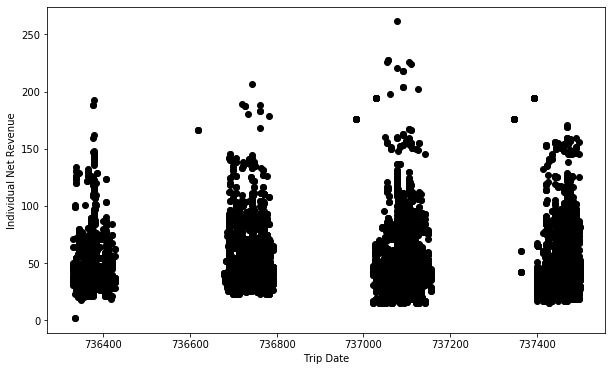

In [223]:
X = df_magic_4[["trip_date", "net_rate_revenue"]]
#Visualise data points
plt.figure(figsize=(10,6))
plt.scatter(X["trip_date"], X["net_rate_revenue"], c='black')
plt.xlabel('Trip Date')
plt.ylabel('Individual Net Revenue')
plt.show()

In [224]:
# Number of clusters
K=9

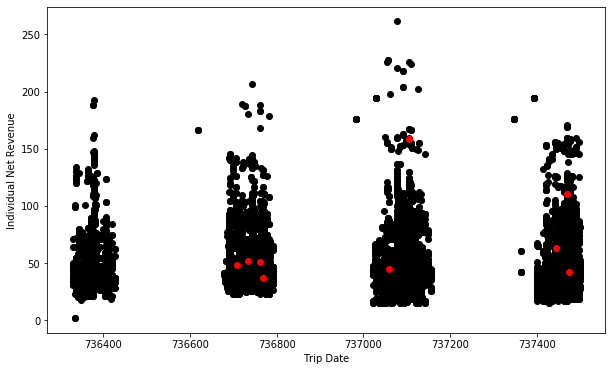

In [225]:
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(10,6))
plt.scatter(X["trip_date"], X["net_rate_revenue"],c='black')
plt.scatter(Centroids["trip_date"],Centroids["net_rate_revenue"],c='red')
plt.xlabel('Trip Date')
plt.ylabel('Individual Net Revenue')
plt.show()

In [226]:
# Assign all the points to the closest cluster centroid
# Recompute centroids of newly formed clusters
# Repeat, reducing cluster standard dev

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["trip_date"]-row_d["trip_date"])**2
            d2=(row_c["net_rate_revenue"]-row_d["net_rate_revenue"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["trip_date","net_rate_revenue"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = ((Centroids_new['trip_date'] - Centroids['trip_date']).sum() + 
        (Centroids_new['net_rate_revenue'] - Centroids['net_rate_revenue']).sum())
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["trip_date","net_rate_revenue"]]

-158.65111258001366
-20.807261231935378
-7.686913726476384
-3.608254412845298
-0.06458629142882444
0.2636839191494076
3.9499635429501865
4.98113203630902
0.21845139660347712
-0.6317213662002814
-0.152024635376371
-0.4499031509052287
-0.39433248570306034
-0.5002560623881322
-0.41454798606773124
-0.0890981361865073
0.0


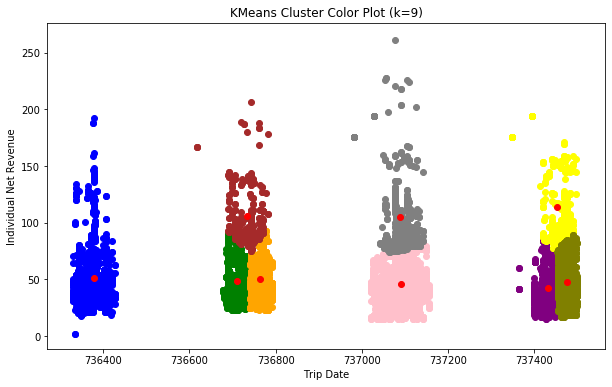

In [227]:
# With 9 Clusters
color=['blue','green','purple','yellow','orange','brown','pink','gray','olive']
plt.figure(figsize=(10,6))
for k in range(K):
    df_magic_4=X[X["Cluster"]==k+1]
    plt.scatter(df_magic_4["trip_date"], df_magic_4["net_rate_revenue"],c=color[k])
plt.scatter(Centroids["trip_date"],Centroids["net_rate_revenue"],c='red')
plt.title('KMeans Cluster Color Plot (k=9)')
plt.xlabel('Trip Date')
plt.ylabel('Individual Net Revenue')
plt.show()

In [456]:
# Pretty much clustering by year and by price.

In [228]:
df_magic_4.head()

trip_date  net_rate_revenue            1           2          3  \
14323     737457             22.32  1078.810350  747.874353  32.944335   
14324     737457             22.32  1078.810350  747.874353  32.944335   
14327     737464             22.32  1085.807846  754.870013  38.672811   
14328     737464             22.32  1085.807846  754.870013  38.672811   
14344     737470             54.87  1091.427882  760.430807  40.637580   

               4           5           6           7           8          9  \
14323  91.397005  693.164227  728.286019  365.682401  377.980478  31.543819   
14324  91.397005  693.164227  728.286019  365.682401  377.980478  31.543819   
14327  92.015419  700.158519  735.240218  372.668076  384.815256  27.947927   
14328  92.015419  700.158519  735.240218  372.668076  384.815256  27.947927   
14344  61.312010  705.607066  738.240385  378.025598  385.131902   9.238101   

       Cluster  
14323        9  
14324        9  
14327        9  
14328        9  
14344        9

In [229]:
df_magic_4[df_magic_4.Cluster == 9].head()

trip_date  net_rate_revenue            1           2          3  \
14323     737457             22.32  1078.810350  747.874353  32.944335   
14324     737457             22.32  1078.810350  747.874353  32.944335   
14327     737464             22.32  1085.807846  754.870013  38.672811   
14328     737464             22.32  1085.807846  754.870013  38.672811   
14344     737470             54.87  1091.427882  760.430807  40.637580   

               4           5           6           7           8          9  \
14323  91.397005  693.164227  728.286019  365.682401  377.980478  31.543819   
14324  91.397005  693.164227  728.286019  365.682401  377.980478  31.543819   
14327  92.015419  700.158519  735.240218  372.668076  384.815256  27.947927   
14328  92.015419  700.158519  735.240218  372.668076  384.815256  27.947927   
14344  61.312010  705.607066  738.240385  378.025598  385.131902   9.238101   

       Cluster  
14323        9  
14324        9  
14327        9  
14328        9  
14344        9

In [230]:
# Not sure is this is any different? Too many clusters?
# Clustering by year/date again, mostly... 

## Model 5 - All numerical columns

In [231]:
df_magic_numeric.columns

Index(['order_id', 'trip_date', 'purchaser_zip', 'net_rate_revenue',
       'order_to_trip_days'],
      dtype='object')

In [232]:
df_magic_5 = df_magic_numeric.copy()

In [233]:
# Tyring to Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
magic_5_scaled = scaler.fit_transform(df_magic_5)

In [234]:
magic_5_scaled

array([[-1.89502144e+00, -1.83046380e+00,  2.69890962e-03,
         2.54759357e+00,  5.11550164e+00],
       [-1.89502144e+00, -1.83046380e+00,  2.69890962e-03,
         2.54759357e+00,  5.11550164e+00],
       [-1.89018345e+00, -1.94148013e+00, -7.87691557e-01,
        -6.88170965e-01,  2.20907252e+00],
       ...,
       [ 1.73639559e+00,  1.28354434e+00,  3.64192083e+00,
        -9.98501406e-02, -3.74420024e-01],
       [ 1.73692195e+00,  1.28354434e+00, -4.97936422e-01,
        -9.98501406e-02, -3.74420024e-01],
       [ 1.73692195e+00,  1.28354434e+00, -4.97936422e-01,
        -9.98501406e-02, -3.74420024e-01]])

In [235]:
# Model if scaled
kmeans_model_5_scaled = KMeans(n_clusters=7)
kmeans_model_5_scaled.fit(magic_5_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [236]:
# Model 5 NOT scaled - with columns
kmeans_model_5 = KMeans(n_clusters=7)

y = kmeans_model_5.fit_predict(df_magic_5[['order_id', 'trip_date',
                                               'purchaser_zip', 'net_rate_revenue', 
                                               'order_to_trip_days']])

df_magic_5['Cluster'] = y

df_magic_5.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  \
15  10105009.0     736377           8742            118.10   
16  10105009.0     736377           8742            118.10   
23  10110579.0     736337           1036             36.26   
24  10110581.0     736372           1036             38.12   
27  10115147.0     736377           8724            120.89   

    order_to_trip_days  Cluster  
15                  86        4  
16                  86        4  
23                  41        4  
24                  76        4  
27                  80        4

In [237]:
df_magic_5.Cluster.describe()

count    13791.000000
mean         2.801030
std          2.001523
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: Cluster, dtype: float64

In [238]:
df_magic_5[df_magic_5.Cluster == 2].head()

order_id  trip_date  purchaser_zip  net_rate_revenue  \
2827  10849472.0     736690          19333             79.04   
2828  10849472.0     736690          19333             57.65   
2829  10849472.0     736690          19333             57.65   
2834  10851373.0     736701          12198             35.33   
2835  10851857.0     736689          10706             75.32   

      order_to_trip_days  Cluster  
2827                  53        2  
2828                  53        2  
2829                  53        2  
2834                  61        2  
2835                  48        2

In [239]:
# What is this inertia thing?  And that is a HUGE number!
kmeans_model_5.inertia_

292090257840437.9

In [240]:
# inertia for scaled data is much better
kmeans_model_5_scaled.inertia_

19255.99498938265

In [241]:
kmeans_model_5.cluster_centers_ 

array([[1.21193353e+07, 7.37077622e+05, 9.45566406e+03, 5.63994885e+01,
        6.47834101e+00],
       [1.40003712e+07, 7.37475985e+05, 8.19712945e+03, 5.34820111e+01,
        4.05859066e+00],
       [1.11364909e+07, 7.36715305e+05, 9.18813076e+03, 5.61129335e+01,
        7.90960773e+00],
       [1.25515646e+07, 7.37140346e+05, 8.17969743e+03, 5.26904954e+01,
        9.75910636e+00],
       [1.05314534e+07, 7.36379022e+05, 8.32041126e+03, 5.14803340e+01,
        4.12430427e+00],
       [1.15678195e+07, 7.36821286e+05, 8.21083834e+03, 5.38990833e+01,
        5.89452932e+00],
       [1.33964008e+07, 7.37436260e+05, 9.72132434e+03, 5.07788719e+01,
        1.02961373e+01]])

In [242]:
kmeans_model_5.labels_

array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

In [243]:
# Scaled data labels look different
kmeans_model_5_scaled.labels_

array([5, 5, 1, ..., 0, 0, 0], dtype=int32)

In [244]:
# At least I now have more of the data I want...

### Groupby Cluster - post KMeans Model

In [245]:
model_clusters = df_magic_5.groupby('Cluster')

In [246]:
model_clusters.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  \
15     10105009.0     736377           8742            118.10   
16     10105009.0     736377           8742            118.10   
23     10110579.0     736337           1036             36.26   
24     10110581.0     736372           1036             38.12   
27     10115147.0     736377           8724            120.89   
2827   10849472.0     736690          19333             79.04   
2828   10849472.0     736690          19333             57.65   
2829   10849472.0     736690          19333             57.65   
2834   10851373.0     736701          12198             35.33   
2835   10851857.0     736689          10706             75.32   
5308   11352717.0     736742           7924             83.69   
5309   11353717.0     736742           6468             55.79   
5310   11353733.0     736742           6468             56.72   
5311   11353744.0     736742           6468             55.79   
5319   11355824.0     736744          10579             48.35   
8292   11845550.0     737134           2118             79.04   
8293   11845550.0     737134           2118             79.04   
8294   11845713.0     737058           2127             77.18   
8295   11845713.0     737058           2127             80.90   
8296   11846310.0     737044           6109             36.26   
11375  12335498.0     737107          10591             45.56   
11376  12335517.0     737107          10591             79.04   
11379  12336491.0     737099           2835             51.14   
11380  12336491.0     737099           2835             51.14   
11383  12336726.0     737099           2835             51.14   
14600  12975850.0     737476           2465             54.87   
14601  12975850.0     737476           2465             83.69   
14602  12975850.0     737476           2465             38.13   
14603  12975850.0     737476           2465             38.13   
14608  12978636.0     737449          13027             45.56   
17138  13705597.0     737450           8742             19.52   
17139  13705597.0     737450           8742             19.52   
17140  13705733.0     737450           7430             48.35   
17141  13705733.0     737450           7430             33.47   
17142  13706870.0     737450           1719             51.14   

       order_to_trip_days  Cluster  
15                     86        4  
16                     86        4  
23                     41        4  
24                     76        4  
27                     80        4  
2827                   53        2  
2828                   53        2  
2829                   53        2  
2834                   61        2  
2835                   48        2  
5308                    1        5  
5309                    1        5  
5310                    1        5  
5311                    1        5  
5319                    3        5  
8292                   95        0  
8293                   95        0  
8294                   19        0  
8295                   19        0  
8296                    5        0  
11375                  12        3  
11376                  12        3  
11379                   4        3  
11380                   4        3  
11383                   4        3  
14600                 100        6  
14601                 100        6  
14602                 100        6  
14603                 100        6  
14608                  72        6  
17138                   1        1  
17139                   1        1  
17140                   1        1  
17141                   1        1  
17142                   1        1

In [ ]:
# Function to examine clusters

In [356]:
def examine_clusters(df):
    rows_list = []
    for i in range(0,7):
        cluster_group = df_magic_5[df_magic_5.Cluster == i]
        rev_mean = cluster_group.net_rate_revenue.mean()
        order_mean = cluster_group.order_to_trip_days.mean()
        zip_median = cluster_group.purchaser_zip.median()
        input_rows = [i, rev_mean, order_mean, zip_median]    
        for item in input_rows:
            dict1 = {'Cluster':i,
                    'Revenue Mean':rev_mean,
                    'Order Mean':order_mean,
                    'Median Zipcode':zip_median}
        rows_list.append(dict1)
    cluster_df = pd.DataFrame(rows_list)   
    return cluster_df

In [425]:
examine_clusters(df_magic_5)

Cluster  Revenue Mean  Order Mean  Median Zipcode
0        0     56.394045    6.473247          6824.0
1        1     53.482011    4.058591          6468.0
2        2     56.097247    7.913538          6807.0
3        3     52.699820    9.761281          6480.0
4        4     51.480334    4.124304          6457.0
5        5     53.913759    5.892118          6478.0
6        6     50.778872   10.296137          7016.0

In [ ]:
# Cluster 6 - Lowest revenue mean and the longest order time, plus further away zip code!


In [ ]:
# is this statisticall significant?

## Model 6 - Without year

In [366]:
df_magic_6 = df_magic_numeric.drop("trip_date", axis=1)

In [367]:
df_magic_6.head()

order_id  purchaser_zip  net_rate_revenue  order_to_trip_days
15  10105009.0           8742            118.10                  86
16  10105009.0           8742            118.10                  86
23  10110579.0           1036             36.26                  41
24  10110581.0           1036             38.12                  76
27  10115147.0           8724            120.89                  80

In [368]:
df_magic_6.columns

Index(['order_id', 'purchaser_zip', 'net_rate_revenue', 'order_to_trip_days'], dtype='object')

In [369]:
kmeans_model_6 = KMeans(n_clusters=7)

y = kmeans_model_6.fit_predict(df_magic_6[['order_id', 'purchaser_zip', 
                                           'net_rate_revenue', 
                                           'order_to_trip_days']])

df_magic_6['Cluster'] = y

df_magic_6.head()

order_id  purchaser_zip  net_rate_revenue  order_to_trip_days  Cluster
15  10105009.0           8742            118.10                  86        4
16  10105009.0           8742            118.10                  86        4
23  10110579.0           1036             36.26                  41        4
24  10110581.0           1036             38.12                  76        4
27  10115147.0           8724            120.89                  80        4

In [370]:
df_magic_6[df_magic_6.Cluster == 3].head()

order_id  purchaser_zip  net_rate_revenue  order_to_trip_days  Cluster
5308  11352717.0           7924             83.69                   1        3
5309  11353717.0           6468             55.79                   1        3
5310  11353733.0           6468             56.72                   1        3
5311  11353744.0           6468             55.79                   1        3
5319  11355824.0          10579             48.35                   3        3

In [371]:
model_clusters_6 = df_magic_6.groupby('Cluster')

In [372]:
model_clusters_6.head()

order_id  purchaser_zip  net_rate_revenue  order_to_trip_days  \
15     10105009.0           8742            118.10                  86   
16     10105009.0           8742            118.10                  86   
23     10110579.0           1036             36.26                  41   
24     10110581.0           1036             38.12                  76   
27     10115147.0           8724            120.89                  80   
2827   10849472.0          19333             79.04                  53   
2828   10849472.0          19333             57.65                  53   
2829   10849472.0          19333             57.65                  53   
2834   10851373.0          12198             35.33                  61   
2835   10851857.0          10706             75.32                  48   
5308   11352717.0           7924             83.69                   1   
5309   11353717.0           6468             55.79                   1   
5310   11353733.0           6468             56.72                   1   
5311   11353744.0           6468             55.79                   1   
5319   11355824.0          10579             48.35                   3   
8292   11845550.0           2118             79.04                  95   
8293   11845550.0           2118             79.04                  95   
8294   11845713.0           2127             77.18                  19   
8295   11845713.0           2127             80.90                  19   
8296   11846310.0           6109             36.26                   5   
11375  12335498.0          10591             45.56                  12   
11376  12335517.0          10591             79.04                  12   
11379  12336491.0           2835             51.14                   4   
11380  12336491.0           2835             51.14                   4   
11383  12336726.0           2835             51.14                   4   
14600  12975850.0           2465             54.87                 100   
14601  12975850.0           2465             83.69                 100   
14602  12975850.0           2465             38.13                 100   
14603  12975850.0           2465             38.13                 100   
14608  12978636.0          13027             45.56                  72   
17138  13705597.0           8742             19.52                   1   
17139  13705597.0           8742             19.52                   1   
17140  13705733.0           7430             48.35                   1   
17141  13705733.0           7430             33.47                   1   
17142  13706870.0           1719             51.14                   1   

       Cluster  
15           4  
16           4  
23           4  
24           4  
27           4  
2827         1  
2828         1  
2829         1  
2834         1  
2835         1  
5308         3  
5309         3  
5310         3  
5311         3  
5319         3  
8292         5  
8293         5  
8294         5  
8295         5  
8296         5  
11375        0  
11376        0  
11379        0  
11380        0  
11383        0  
14600        6  
14601        6  
14602        6  
14603        6  
14608        6  
17138        2  
17139        2  
17140        2  
17141        2  
17142        2

In [373]:
df_magic_6.head()

order_id  purchaser_zip  net_rate_revenue  order_to_trip_days  Cluster
15  10105009.0           8742            118.10                  86        4
16  10105009.0           8742            118.10                  86        4
23  10110579.0           1036             36.26                  41        4
24  10110581.0           1036             38.12                  76        4
27  10115147.0           8724            120.89                  80        4

In [ ]:
# Again, it's just grouping by zip code I believe.

In [388]:
cluster_list = df_magic_6.Cluster.unique()

In [389]:
cluster_list.sort()

In [394]:
cluster_list = cluster_list.tolist()

In [396]:
cluster_list

[0, 1, 2, 3, 4, 5, 6]

In [398]:
list(range(0,7))

[0, 1, 2, 3, 4, 5, 6]

In [467]:
range(0,7)

range(0, 7)

In [458]:
df_magic_6.order_to_trip_days.max()

227

In [474]:
def examine_clusters_again(df):
    rows_list = []
    cluster_list = df.Cluster.unique()
    cluster_list.sort()
    cluster_list = cluster_list.tolist()
    for i in cluster_list:
        cluster_group = df_magic_5[df_magic_5.Cluster == i]
        rev_mean = cluster_group.net_rate_revenue.mean()
        rev_max = cluster_group.net_rate_revenue.max()
        rev_min = cluster_group.net_rate_revenue.min()
        order_mean = cluster_group.order_to_trip_days.mean()
        order_max = cluster_group.order_to_trip_days.max()
        order_min = cluster_group.order_to_trip_days.min()
        zip_median = cluster_group.purchaser_zip.median()
        dict1 = {'Cluster':i,
                 'Revenue Mean':rev_mean,
                 'Revenue Max':rev_max,
                 'Revenue Min':rev_min,
                 'Order Mean':order_mean,
                 'Order Max':order_max,
                 'Order Min':order_min,
                 'Median Zipcode':zip_median}
        rows_list.append(dict1)
    cluster_df = pd.DataFrame(rows_list)   
    return cluster_df

In [475]:
examine_clusters_again(df_magic_6)

Cluster  Revenue Mean  Revenue Max  Revenue Min  Order Mean  Order Max  \
0        0     56.394045       261.32        14.87    6.473247         95   
1        1     53.482011       171.11        18.59    4.058591         38   
2        2     56.097247       206.45        23.24    7.913538        109   
3        3     52.699820       224.12        14.87    9.761281        227   
4        4     51.480334       192.50         1.86    4.124304         93   
5        5     53.913759       194.37        14.87    5.892118        131   
6        6     50.778872       194.37        16.73   10.296137        100   

   Order Min  Median Zipcode  
0          1          6824.0  
1          1          6468.0  
2          1          6807.0  
3          1          6480.0  
4          0          6457.0  
5          1          6478.0  
6          1          7016.0

## Model 7 - Everything Scaled

In [428]:
df_magic_7 = df_magic_numeric.copy()

In [429]:
df_magic_7.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  order_to_trip_days
15  10105009.0     736377           8742            118.10                  86
16  10105009.0     736377           8742            118.10                  86
23  10110579.0     736337           1036             36.26                  41
24  10110581.0     736372           1036             38.12                  76
27  10115147.0     736377           8724            120.89                  80

In [430]:
scaler = MinMaxScaler()
model_7_scaled = scaler.fit_transform(df_magic_7)

In [431]:
model_7_scaled[0]

array([0.        , 0.04102564, 0.088986  , 0.4480074 , 0.37885463])

In [432]:
# Not sure what to do with this scaled array!

In [433]:
kmeans_model_7 = KMeans(n_clusters=3)
y_kmeans_7 = kmeans_model_7.fit_predict(model_7_scaled)
y_kmeans_7

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [434]:
# Not sure if this worked either

In [435]:
kmeans_model_7 = KMeans(n_clusters=7)

y = kmeans_model_7.fit_predict(model_7_scaled)

df_magic_7['Cluster'] = y

df_magic_7.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  \
15  10105009.0     736377           8742            118.10   
16  10105009.0     736377           8742            118.10   
23  10110579.0     736337           1036             36.26   
24  10110581.0     736372           1036             38.12   
27  10115147.0     736377           8724            120.89   

    order_to_trip_days  Cluster  
15                  86        2  
16                  86        2  
23                  41        2  
24                  76        2  
27                  80        2

## Model 8 - Elbow Method Again with Clustering

In [436]:
df_magic_8 = df_magic_numeric.copy()
df_magic_8.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  order_to_trip_days
15  10105009.0     736377           8742            118.10                  86
16  10105009.0     736377           8742            118.10                  86
23  10110579.0     736337           1036             36.26                  41
24  10110581.0     736372           1036             38.12                  76
27  10115147.0     736377           8724            120.89                  80

In [437]:
x = df_magic_8.iloc[:, [0,1,2,3,4]].values

In [438]:
x[0]

array([1.0105009e+07, 7.3637700e+05, 8.7420000e+03, 1.1810000e+02,
       8.6000000e+01])

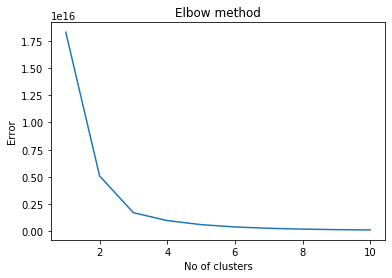

In [439]:
# Elbow Method
Error =[]
for i in range(1, 11):
    kmeans_model_8 = KMeans(n_clusters = i).fit(x)
    kmeans_model_8.fit(x)
    Error.append(kmeans_model_8.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [440]:
kmeans_model_8 = KMeans(n_clusters=3)
y_kmeans_8 = kmeans_model_8.fit_predict(x)
y_kmeans_8

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [441]:
kmeans_model_8.cluster_centers_

array([[1.10623287e+07, 7.36623005e+05, 8.50513806e+03, 5.38322069e+01,
        4.86754702e+00],
       [1.37691305e+07, 7.37460422e+05, 8.79668614e+03, 5.24017159e+01,
        6.00145419e+00],
       [1.22874863e+07, 7.37104627e+05, 8.86955817e+03, 5.46040840e+01,
        9.56695950e+00]])

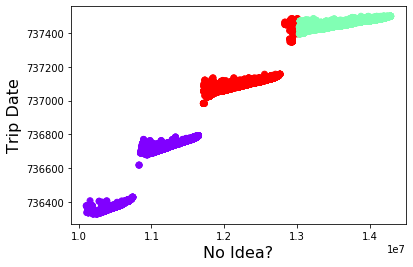

In [466]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans_8, cmap='rainbow')
plt.ylabel('Trip Date', fontsize=16)
plt.xlabel('No Idea?', fontsize=16)
plt.show()

# Models Again

## Grouped by Address

I would group each order by address and make features like number of tickets purchases, number of adult tickets purchased, number of child tickets purchased, etc

In [443]:
df_magic.head()

order_id                              product ticket_type order_date  \
15  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
16  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
23  10110579.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
24  10110581.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
27  10115147.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-29   

    trip_date     purchaser_address  purchaser_city purchaser_state  \
15 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
16 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
23 2017-01-08       205 Chapin Road         Hampden              MA   
24 2017-02-12       205 Chapin Road         Hampden              MA   
27 2017-02-17      332 Jefferson Ct           Brick              NJ   

    purchaser_zip  net_rate_revenue  order_to_trip_days  
15           8742            118.10                  86  
16           8742            118.10                  86  
23           1036             36.26                  41  
24           1036             38.12                  76  
27           8724            120.89                  80

In [444]:
df.purchaser_address.value_counts()

733 PROSPECT ST               33
8 Kane Road                   28
136 Rhodes Road               25
456 Jones Hollow Road         23
209 old kings hwy North       22
                              ..
80 Warren St, Apt 50           1
75 silvermine rd               1
5902 Printery Street, #102     1
825 County Route 77            1
370 River Rd                   1
Name: purchaser_address, Length: 5802, dtype: int64

In [445]:
df.order_id.value_counts(bins=3)

(11493560.0, 12890021.0]      7651
(10092909.616, 11493560.0]    6061
(12890021.0, 14286482.0]      5960
Name: order_id, dtype: int64

## Groupby Repeat Ticket Type

In [591]:
skiier_map.tail()

order_id order_status                              product  \
19607  14266821.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19608  14285295.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19609  14285522.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19610  14285522.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19611  14285876.0         PAID  Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
19607           Adult  Magic Mountain 2020-03-11 2020-03-12              Yes   
19608           Adult  Magic Mountain 2020-03-14 2020-03-15               No   
19609           Adult    Liftopia.com 2020-03-14 2020-03-15               No   
19610  Youth / Senior    Liftopia.com 2020-03-14 2020-03-15               No   
19611           Adult  Magic Mountain 2020-03-14 2020-03-15               No   

       purchaser_address  purchaser_city purchaser_state  purchaser_zip  \
19607       P.O. Box 367       Tyringham              MA           1264   
19608  429 Center Street      Zelienople              PA          16063   
19609                NaN   Safety Harbor              FL          34695   
19610                NaN   Safety Harbor              FL          34695   
19611      1752 18th st.  Cuyahoga Falls              OH          44223   

      purchaser_country  net_rate_revenue currency  order_to_trip_days    zip  \
19607                US             26.03      USD                   1   1264   
19608                US             51.14      USD                   1  16063   
19609                US             46.74      USD                   1  34695   
19610                US             38.24      USD                   1  34695   
19611                US             51.14      USD                   1  44223   

       latitude  longitude  Miles to Resort  
19607     42.24     -73.19        69.312836  
19608     40.78     -80.14       414.700072  
19609     28.00     -82.69      1185.262096  
19610     28.00     -82.69      1185.262096  
19611     41.16     -81.52       470.836891

In [571]:
all_customers = skiier_map.groupby('purchaser_address')['trip_date'].nunique()
all_customers = pd.DataFrame(all_customers)

In [572]:
all_customers.columns = ['Number of Trips']

In [573]:
all_customers.head()

Number of Trips
purchaser_address                           
!4 Cedar Terrace                           2
#433, 700 Bloomfield Avenue                1
08 woodmont rd                             1
1 Abington Road                            1
1 Andrew Circle                            1

In [574]:
skiier_map.groupby('purchaser_address')['net_rate_revenue'].mean()

purchaser_address
!4 Cedar Terrace               70.67
#433, 700 Bloomfield Avenue    60.44
08 woodmont rd                 82.76
1 Abington Road                41.84
1 Andrew Circle                52.07
                               ...  
po box 551                     33.16
po box 596                     59.51
po box 605                     55.79
po box 75                      62.30
po. box 507                    79.04
Name: net_rate_revenue, Length: 5780, dtype: float64

In [575]:
all_customers["Mean Revenue"] = skiier_map.groupby('purchaser_address')['net_rate_revenue'].mean()

In [576]:
all_customers.head()

Number of Trips  Mean Revenue
purchaser_address                                         
!4 Cedar Terrace                           2         70.67
#433, 700 Bloomfield Avenue                1         60.44
08 woodmont rd                             1         82.76
1 Abington Road                            1         41.84
1 Andrew Circle                            1         52.07

In [577]:
skiier_map.groupby('purchaser_address')['order_to_trip_days'].mean()

purchaser_address
!4 Cedar Terrace               2.000000
#433, 700 Bloomfield Avenue    1.000000
08 woodmont rd                 1.000000
1 Abington Road                5.000000
1 Andrew Circle                1.000000
                                 ...   
po box 551                     5.333333
po box 596                     3.000000
po box 605                     1.000000
po box 75                      1.000000
po. box 507                    1.000000
Name: order_to_trip_days, Length: 5780, dtype: float64

In [578]:
all_customers["Mean Order Time"] = skiier_map.groupby('purchaser_address')['order_to_trip_days'].mean()

In [579]:
all_customers['Adult Tickets'] = skiier_map[skiier_map['ticket_type'] =='Adult'].groupby('purchaser_address')['ticket_type'].count()

In [580]:
all_customers['Youth/Senior Tickets'] = skiier_map[skiier_map['ticket_type'] =='Youth / Senior'].groupby('purchaser_address')['ticket_type'].count()

In [581]:
all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  
purchaser_address                                                 
!4 Cedar Terrace                       4.0                   NaN  
#433, 700 Bloomfield Avenue            1.0                   NaN  
08 woodmont rd                         NaN                   1.0  
1 Abington Road                        1.0                   NaN  
1 Andrew Circle                        4.0                   NaN

In [582]:
all_customers['Adult Tickets'] = all_customers['Adult Tickets'].fillna(0)

In [583]:
all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  
purchaser_address                                                 
!4 Cedar Terrace                       4.0                   NaN  
#433, 700 Bloomfield Avenue            1.0                   NaN  
08 woodmont rd                         0.0                   1.0  
1 Abington Road                        1.0                   NaN  
1 Andrew Circle                        4.0                   NaN

In [584]:
all_customers['Youth/Senior Tickets'] = all_customers['Youth/Senior Tickets'].fillna(0)

In [585]:
all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  
purchaser_address                                                 
!4 Cedar Terrace                       4.0                   0.0  
#433, 700 Bloomfield Avenue            1.0                   0.0  
08 woodmont rd                         0.0                   1.0  
1 Abington Road                        1.0                   0.0  
1 Andrew Circle                        4.0                   0.0

In [501]:
import geopy.distance

In [552]:
coords_1 = (43.192778, -72.76)
distance = []
for i in range(len(skiier_map)):
    coords_2 = (skiier_map.latitude[i], skiier_map.longitude[i])
    miles = geopy.distance.distance(coords_1, coords_2).miles
    distance.append(miles)

In [546]:
skiier_map['Miles to Resort'] = distance

In [554]:
skiier_map.tail()

order_id order_status                              product  \
19607  14266821.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19608  14285295.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19609  14285522.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19610  14285522.0         PAID  Magic Mountain | 1 Day Lift Tickets   
19611  14285876.0         PAID  Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
19607           Adult  Magic Mountain 2020-03-11 2020-03-12              Yes   
19608           Adult  Magic Mountain 2020-03-14 2020-03-15               No   
19609           Adult    Liftopia.com 2020-03-14 2020-03-15               No   
19610  Youth / Senior    Liftopia.com 2020-03-14 2020-03-15               No   
19611           Adult  Magic Mountain 2020-03-14 2020-03-15               No   

       purchaser_address  purchaser_city purchaser_state  purchaser_zip  \
19607       P.O. Box 367       Tyringham              MA           1264   
19608  429 Center Street      Zelienople              PA          16063   
19609                NaN   Safety Harbor              FL          34695   
19610                NaN   Safety Harbor              FL          34695   
19611      1752 18th st.  Cuyahoga Falls              OH          44223   

      purchaser_country  net_rate_revenue currency  order_to_trip_days    zip  \
19607                US             26.03      USD                   1   1264   
19608                US             51.14      USD                   1  16063   
19609                US             46.74      USD                   1  34695   
19610                US             38.24      USD                   1  34695   
19611                US             51.14      USD                   1  44223   

       latitude  longitude  Miles to Resort  
19607     42.24     -73.19        69.312836  
19608     40.78     -80.14       414.700072  
19609     28.00     -82.69      1185.262096  
19610     28.00     -82.69      1185.262096  
19611     41.16     -81.52       470.836891

In [588]:
all_customers["Miles to Resort"] = skiier_map.groupby('purchaser_address')['Miles to Resort'].mean()

In [593]:
all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   

                             Miles to Resort  
purchaser_address                             
!4 Cedar Terrace                  216.871422  
#433, 700 Bloomfield Avenue        95.456885  
08 woodmont rd                    178.489755  
1 Abington Road                   250.364930  
1 Andrew Circle                    95.481157

In [600]:
all_customers.describe()

Number of Trips  Mean Revenue  Mean Order Time  Adult Tickets  \
count      5780.000000   5780.000000      5780.000000    5780.000000   
mean          1.244637     55.438150         6.213475       1.664879   
std           0.739942     24.855304        13.659577       1.397466   
min           1.000000     14.870000         0.000000       0.000000   
25%           1.000000     42.615000         1.000000       1.000000   
50%           1.000000     51.140000         2.000000       1.000000   
75%           1.000000     61.370000         5.000000       2.000000   
max          13.000000    261.320000       192.000000      25.000000   

       Youth/Senior Tickets  Miles to Resort  
count           5780.000000      5780.000000  
mean               0.635813       175.634039  
std                1.317839       262.965176  
min                0.000000         2.982793  
25%                0.000000        92.853950  
50%                0.000000       128.924797  
75%                1.000000       178.083874  
max               16.000000      4981.738462

In [ ]:
# Looking at the parms for k-means
wcss = []
for i in range(1, 11):
    kmeans_all_customers_model_1 = KMeans(n_clusters=i, init='k-means++', 
                                          max_iter=300, n_init=10, random_state=0)
    kmeans_all_customers_model_1.fit(all_customers)
    wcss.append( kmeans_all_customers_model_1.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS - Within Cluster Sum of Squares')
plt.show()

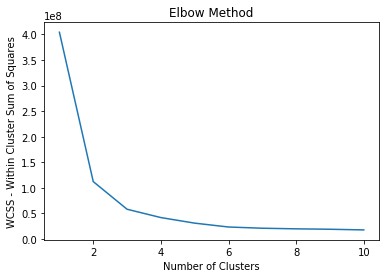

In [673]:
# not much difference
wcss = []
for i in range(1, 11):
    kmeans_all_customers_model_1 = KMeans(n_clusters=i, init='random', 
                                          max_iter=300, n_init=10, random_state=0)
    kmeans_all_customers_model_1.fit(all_customers)
    wcss.append( kmeans_all_customers_model_1.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS - Within Cluster Sum of Squares')
plt.show()

In [602]:
all_customers.columns

Index(['Number of Trips', 'Mean Revenue', 'Mean Order Time', 'Adult Tickets',
       'Youth/Senior Tickets', 'Miles to Resort'],
      dtype='object')

In [603]:
kmeans_all_customers_model_2 = KMeans(n_clusters=3)

y = kmeans_all_customers_model_2.fit_predict(all_customers[['Number of Trips',
                                                            'Mean Revenue',
                                                            'Mean Order Time',
                                                            'Adult Tickets',
                                                            'Youth/Senior Tickets', 
                                                            'Miles to Resort']])

all_customers['Cluster'] = y

all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   

                             Miles to Resort  Cluster  
purchaser_address                                      
!4 Cedar Terrace                  216.871422        2  
#433, 700 Bloomfield Avenue        95.456885        2  
08 woodmont rd                    178.489755        2  
1 Abington Road                   250.364930        2  
1 Andrew Circle                    95.481157        2

In [604]:
kmeans_model_clusters = all_customers.groupby('Cluster')

In [608]:
kmeans_model_clusters.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2      70.67000              2.0   
#433, 700 Bloomfield Avenue                1      60.44000              1.0   
08 woodmont rd                             1      82.76000              1.0   
1 Abington Road                            1      41.84000              5.0   
1 Andrew Circle                            1      52.07000              1.0   
1001 South Brown School Rd                 1     129.27000              1.0   
101 fairview                               1      39.98000             12.0   
10216 Thurston Groves Blvd                 1      52.07000              1.0   
1056 Gwyn circle                           1      65.09000              1.0   
10561 bandera mountain lane                1      53.93000              1.0   
106 Aline Street                           1      74.39000              1.0   
106 Chipola Road                           1      14.87000              1.0   
11437 S Dry Creek Rd                       1      45.09500              5.0   
1215 Arguello Blvd.                        1      38.12000              2.0   
1392 Nanialii St                           1      24.51875              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   
1001 South Brown School Rd             1.0                   0.0   
101 fairview                           2.0                   0.0   
10216 Thurston Groves Blvd             1.0                   0.0   
1056 Gwyn circle                       0.0                   2.0   
10561 bandera mountain lane            1.0                   0.0   
106 Aline Street                       1.0                   0.0   
106 Chipola Road                       0.0                   0.0   
11437 S Dry Creek Rd                   2.0                   0.0   
1215 Arguello Blvd.                    1.0                   0.0   
1392 Nanialii St                       0.0                   0.0   

                             Miles to Resort  Cluster  
purchaser_address                                      
!4 Cedar Terrace                  216.871422        2  
#433, 700 Bloomfield Avenue        95.456885        2  
08 woodmont rd                    178.489755        2  
1 Abington Road                   250.364930        2  
1 Andrew Circle                    95.481157        2  
1001 South Brown School Rd        634.873556        0  
101 fairview                     1737.692750        1  
10216 Thurston Groves Blvd       1194.986852        0  
1056 Gwyn circle                 1106.845158        0  
10561 bandera mountain lane      2297.548670        1  
106 Aline Street                 1390.148641        0  
106 Chipola Road                 1114.546199        0  
11437 S Dry Creek Rd             2006.583748        1  
1215 Arguello Blvd.              2607.640590        1  
1392 Nanialii St                 4981.738462        1

In [665]:
kmeans_all_customers_model_3 = KMeans(n_clusters=5)

y = kmeans_all_customers_model_3.fit_predict(all_customers[['Number of Trips',
                                                            'Mean Revenue',
                                                            'Mean Order Time',
                                                            'Adult Tickets',
                                                            'Youth/Senior Tickets', 
                                                            'Miles to Resort']])

all_customers['Cluster'] = y

all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   

                             Miles to Resort  Cluster  
purchaser_address                                      
!4 Cedar Terrace                  216.871422        0  
#433, 700 Bloomfield Avenue        95.456885        4  
08 woodmont rd                    178.489755        0  
1 Abington Road                   250.364930        0  
1 Andrew Circle                    95.481157        4

In [669]:
kmeans_all_customers_model_4 = KMeans(n_clusters=7)

y = kmeans_all_customers_model_4.fit_predict(all_customers[['Number of Trips',
                                                            'Mean Revenue',
                                                            'Mean Order Time',
                                                            'Adult Tickets',
                                                            'Youth/Senior Tickets', 
                                                            'Miles to Resort']])

all_customers['Cluster'] = y

all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   

                             Miles to Resort  Cluster  
purchaser_address                                      
!4 Cedar Terrace                  216.871422        1  
#433, 700 Bloomfield Avenue        95.456885        5  
08 woodmont rd                    178.489755        1  
1 Abington Road                   250.364930        0  
1 Andrew Circle                    95.481157        5

In [648]:
all_customers.Cluster.value_counts()

2    5576
0     153
1      51
Name: Cluster, dtype: int64

In [649]:
all_customers.Cluster.unique()

array([2, 0, 1])

In [650]:
cluster_list = all_customers.Cluster.unique()

In [651]:
cluster_list

array([2, 0, 1])

In [652]:
cluster_list[0]

2

In [655]:
cluster_list = cluster_list.tolist()

In [656]:
type(cluster_list)

list

In [657]:
cluster_list.sort()

In [658]:
cluster_list

[0, 1, 2]

In [662]:
len(all_customers[all_customers['Cluster'] == 0])

153

In [667]:
def examine_clusters_again(df):
    rows_list = []
    cluster_list = df.Cluster.unique()
    cluster_list = cluster_list.tolist()
    cluster_list.sort()
    for i in cluster_list:
        cluster_group = df[df.Cluster == i]
        cluster_length = len(df[df['Cluster'] == i])
        trip_mean = cluster_group['Number of Trips'].mean()
        rev_mean = cluster_group['Mean Revenue'].mean()
        order_mean = cluster_group['Mean Order Time'].mean()
        adult_mean = cluster_group['Adult Tickets'].mean()
        youth_mean = cluster_group['Youth/Senior Tickets'].mean()
        miles_mean = cluster_group['Miles to Resort'].mean()
        dict1 = {'Cluster':i,
                 'Number of Visitors':cluster_length,
                 'Trips Mean':trip_mean,
                 'Revenue Mean':rev_mean,
                 'Order Mean':order_mean,
                 'Adult Tics Mean':adult_mean,
                 'Youth Tics Mean':youth_mean,
                 'Miles Away Mean':miles_mean}
        rows_list.append(dict1)
    cluster_df = pd.DataFrame(rows_list)   
    return cluster_df

In [670]:
examine_clusters_again(all_customers)

Cluster  Number of Visitors  Trips Mean  Revenue Mean  Order Mean  \
0        0                 428    1.182243     60.270310   10.777817   
1        1                2507    1.237734     59.027916    6.595162   
2        2                  36    1.111111     65.133272    3.314815   
3        3                  79    1.164557     68.610386    7.028270   
4        4                  90    1.100000     62.704298   12.017778   
5        5                2639    1.270557     50.481586    4.929799   
6        6                   1    1.000000     24.518750    1.000000   

   Adult Tics Mean  Youth Tics Mean  Miles Away Mean  
0         1.787383         0.509346       299.321707  
1         1.665337         0.732349       162.062169  
2         1.555556         0.277778      2466.636307  
3         1.569620         0.455696      1358.703056  
4         1.633333         0.222222       778.228644  
5         1.650625         0.589238        79.426461  
6         0.000000         0.000000      4981.738462

In [671]:
all_customers.head()

Number of Trips  Mean Revenue  Mean Order Time  \
purchaser_address                                                             
!4 Cedar Terrace                           2         70.67              2.0   
#433, 700 Bloomfield Avenue                1         60.44              1.0   
08 woodmont rd                             1         82.76              1.0   
1 Abington Road                            1         41.84              5.0   
1 Andrew Circle                            1         52.07              1.0   

                             Adult Tickets  Youth/Senior Tickets  \
purchaser_address                                                  
!4 Cedar Terrace                       4.0                   0.0   
#433, 700 Bloomfield Avenue            1.0                   0.0   
08 woodmont rd                         0.0                   1.0   
1 Abington Road                        1.0                   0.0   
1 Andrew Circle                        4.0                   0.0   

                             Miles to Resort  Cluster  
purchaser_address                                      
!4 Cedar Terrace                  216.871422        1  
#433, 700 Bloomfield Avenue        95.456885        5  
08 woodmont rd                    178.489755        1  
1 Abington Road                   250.364930        0  
1 Andrew Circle                    95.481157        5

In [ ]:
all_customers.groupby()

In [679]:
the_customers = skiier_map.groupby('purchaser_address')['trip_date'].nunique()
the_customers = pd.DataFrame(the_customers)

In [680]:
repeat_customers = the_customers[the_customers.trip_date > 1]

In [681]:
non_repeat_cust = the_customers[the_customers.trip_date <= 1]

In [452]:
repeat_customers.head()

trip_date
purchaser_address             
!4 Cedar Terrace             2
1 Astor Place                2
1 E. Welling Avenue          2
1 Edgehill Terrace           2
1 Fore River Ave             2

In [453]:
repeat_customers.describe()

trip_date
count  902.000000
mean     2.573171
std      1.193150
min      2.000000
25%      2.000000
50%      2.000000
75%      3.000000
max     13.000000

In [454]:
non_repeat_cust.head()

trip_date
purchaser_address                     
#433, 700 Bloomfield Avenue          1
08 woodmont rd                       1
1 Abington Road                      1
1 Andrew Circle                      1
1 Bentley Dr                         1

In [455]:
non_repeat_cust.describe()

trip_date
count     4900.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0

In [682]:
skiier_map.head()

order_id order_status                              product  \
0  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10402020.0         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store order_date  trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
1           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
2  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
3           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
4           Adult    Liftopia.com 2017-01-23 2017-01-28               No   

     purchaser_address purchaser_city purchaser_state  purchaser_zip  \
0  23 Jefferson Circle        Clinton              CT           6413   
1  23 Jefferson Circle        Clinton              CT           6413   
2  23 Jefferson Circle        Clinton              CT           6413   
3  23 Jefferson Circle        Clinton              CT           6413   
4                  NaN        clinton              CT           6413   

  purchaser_country  net_rate_revenue currency  order_to_trip_days   zip  \
0                US             50.21      USD                  50  6413   
1                US             69.74      USD                  50  6413   
2                US             50.21      USD                  50  6413   
3                US             69.74      USD                  50  6413   
4                US             40.79      USD                   5  6413   

   latitude  longitude  Miles to Resort  
0     41.27     -72.53        133.23436  
1     41.27     -72.53        133.23436  
2     41.27     -72.53        133.23436  
3     41.27     -72.53        133.23436  
4     41.27     -72.53        133.23436

## Groupby Youth

In [510]:
adult_tics = df[df['ticket_type'] =='Adult'].groupby('purchaser_address')['ticket_type'].count()
adult_tics = pd.DataFrame(adult_tics)
adult_tics.head()

ticket_type
purchaser_address                       
!4 Cedar Terrace                       4
#433, 700 Bloomfield Avenue            1
1 Abington Road                        1
1 Andrew Circle                        4
1 Astor Place                          3

In [511]:
repeat_customers['adult'] = adult_tics['ticket_type']
repeat_customers.head()

trip_date  adult
purchaser_address                    
!4 Cedar Terrace             2    4.0
1 Astor Place                2    3.0
1 E. Welling Avenue          2    4.0
1 Edgehill Terrace           2    4.0
1 Fore River Ave             2    NaN

In [512]:
youth_tics = df[df['ticket_type'] =='Youth / Senior'].groupby('purchaser_address')['ticket_type'].count()
youth_tics = pd.DataFrame(youth_tics)
youth_tics.head()

ticket_type
purchaser_address               
08 woodmont rd                 1
1 Cowesit Ave.                 2
1 E. Welling Avenue            4
1 Fore River Ave               2
1 Forge Ln                     4

In [513]:
repeat_customers['kid/senior'] = youth_tics['ticket_type']
repeat_customers.head()

trip_date  adult  kid/senior
purchaser_address                                
!4 Cedar Terrace             2    4.0         NaN
1 Astor Place                2    3.0         NaN
1 E. Welling Avenue          2    4.0         4.0
1 Edgehill Terrace           2    4.0         NaN
1 Fore River Ave             2    NaN         2.0

In [514]:
repeat_customers.sort_values("trip_date", ascending=False,)

trip_date  adult  kid/senior
purchaser_address                                 
440 Kent Avenue, 14C         13   11.0         8.0
2071 Main Street             11   21.0         NaN
218 Hartford st               9   10.0         NaN
733 PROSPECT ST               9   25.0         8.0
136 Rhodes Road               9   14.0        11.0
...                         ...    ...         ...
25 KIEFERLE ROAD              2    2.0         NaN
25 Swartson ct                2    2.0         NaN
25 chelton ave                2    6.0         NaN
25 old school street          2    2.0         NaN
3123 Lovers Lane              2    3.0         NaN

[902 rows x 3 columns]

In [515]:
repeat_customers.fillna(0)

trip_date  adult  kid/senior
purchaser_address                                
!4 Cedar Terrace             2    4.0         0.0
1 Astor Place                2    3.0         0.0
1 E. Welling Avenue          2    4.0         4.0
1 Edgehill Terrace           2    4.0         0.0
1 Fore River Ave             2    0.0         2.0
...                        ...    ...         ...
po box 265                   2    2.0         0.0
po box 268                   2    0.0         2.0
po box 431                   2    3.0         1.0
po box 474                   2    3.0         3.0
po box 551                   3    3.0         0.0

[902 rows x 3 columns]

In [ ]:
repeat_customers.describe()

In [ ]:
repeat_customers.adult.sum() + repeat_customers['kid/senior'].sum()

## Groupby Repeat Adults

In [ ]:
repeat_adult_customers = repeat_customers.dropna()
repeat_adult_customers.head()

In [ ]:
repeat_adult_customers.describe()

## Groupby Return Customer Address

In [ ]:
df[df.purchaser_address == '1 E. Welling Avenue']

In [ ]:
return_customers = df.groupby('purchaser_address')['trip_date', 'product', 'store', 'ticket_type']

In [ ]:
return_customers.first()

In [ ]:
customers_by_address = df.groupby(['purchaser_address'])['net_rate_revenue','store', 'ticket_type', 'trip_date']

In [ ]:
customers_by_address.first()

In [ ]:
customers_by_address.head()

In [ ]:
customers_by_address

In [ ]:
customers_by_address.get_dummies()

In [ ]:
# Replace target values - there are three classes
customers_by_address = customers_by_address.replace({'store': {'Liftopia.com' : 1, 'Magic Mountain' : 0}})

In [ ]:
customers_by_address

In [ ]:
bins_store_type = [0, 1]
bins_store = pd.cut(customers_by_address['store'], bins_store_type)
bins_store = bins_store.cat.as_ordered()

store_dummy = pd.get_dummies(bins_store, prefix="store")
customers_by_address = customers_by_address.drop(["store"], axis=1)
customers_by_address = pd.concat([customers_by_address, store_dummy], axis=1)

## Groupby Address and Ticket

In [ ]:
customers_with_ticket = df.groupby('purchaser_address')['ticket_type'].apply(lambda group_series: group_series.tolist())

In [ ]:
customers_with_ticket.head()

## Groupby Address and Date

In [ ]:
customer_dates = df.groupby('purchaser_address')['trip_date'].apply(lambda group_series: group_series.tolist())

In [ ]:
customer_dates.head()

## Groupby Zipcode

In [ ]:
customers_by_zip = df.groupby(['purchaser_zip','trip_date','ticket_type'])

In [ ]:
customers_by_zip.first()

# Summary

# Future Recommendations

Include the data from Day-Ticket and Season Pass Holders. 
Split up the Youth/Senior section and look more specifically at ages.